# WSDM - KKBox's Music Recommendation Challenge

# Introduction
* We know Recommendation is widely used in our daily life.Specially in the E-commerce area ,a good recommendation system can help user a lot.
* Here we are taking about Music recommendation systam.People are like to listen music in there office time , gym time or focus time etc.Music connect people what they are doing.
* Different people have dfferent teste of music.for buid recommendation systam for music than we need users historical daa.
* Now days internet made life easy in term of listen our favorite music.but still algorithms are needed to serve user's favorite music without selecting manually.

# Problem Description
* WSDM has challenged the Kaggle ML community to build better music recommendation system using donated dataset from KKBOX.
* [Kaggle Competition Link](https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data)
* Challenge : Build a recommendation system that can predict whether a user will listen again to a song within one month after the user's very first observable listening event occurred.

# Machine Learning Problem Formulation 
#### Why we use Machine Learning in this task ?
#### Ans : We have to predict that if user listen a song than what is the chance of user will listen that song again.We have user's past data so it is perfect to use machine learning here.
* We have to predict the chance of a user listening to a song repetitively after the first oobservable listening  event occurred.
* KKBOX provided a data which contain information of the first observation of listening event for each user.
* Here problem is binary classification.

# Data Overview
### we have total 6 csv files.
### 1. train.csv
* msno: user id
* song_id: song id
* source_system_tab: the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions. For example, tab my library contains functions to manipulate the local storage, and tab search contains functions relating to search.
* source_screen_name: name of the layout a user sees.
* source_type: an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc.
* target: this is the target variable. target=1 means there are recurring listening event(s) triggered within a month  after the user’s very first observable listening event, target=0 otherwise .

### 2. songs.csv - song information.
* song_id : ids of songs.
* song_length: length of song in ms.
* genre_ids: genre category. Some songs have multiple genres and they are separated by |.
* language : language of song.
* artist_name  
* composer
* lyricist 

### 3. members.csv - user information.
* msno : ids of users.
* city : city of user.
* bd   : age. Note: This column has outlier values, please use your judgement.
* gender : gender of users.
* registered_via : registration method
* registration_init_time : format %Y%m%d
* expiration_date : format %Y%m%d

### 4. song_extra_info.csv
* song_id
* song name - the name of the song.
* isrc - The International Standard Recording Code (or ISRC code) is a unique identification system for sound recordings     and music video recordings.

### 5. test.csv

* id: row id (will be used for submission)
* msno: user id
* song_id: song id
* source_system_tab: the name of the tab where the event was triggered.
* source_screen_name: name of the layout a user sees.
* source_type: an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc.


### 6. sample_submission.csv
 
* id: same as id in test.csv
* target: this is the target variable. target=1 means there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, target=0 otherwise .

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [ ]:
os.chdir(r"G:\Project 1\Music Recommandation Systam\csv files")
files = os.listdir()

In [ ]:
# function for remove columns which name start with 'Unnamed:'
# input  : dataframe
# output : dataframe without 'Unnamed:' columns
def remove_function(data):
    for i in data.columns:
        if i.split()[0] == 'Unnamed:':
            data = data.drop(i,axis = 1)
    return data

# function for find unique values 
# input  : dataframe
# output : list of unique values in each columns of dataframe
def info(data):
    
    columns_name = list(data.columns)
    print('columns_name',' '*(10),'unique_values' , ' '*(7),'Type' )
    print('-'*50)
    
    for name in columns_name:
        length = str(len(list(set(data[name].values)))) 
        print(name ,(25-len(name))*' ','|', length ,(10 - len(length) )*' ','|', data[name].dtype) 
    print('_'*50)
    return 

# function for find missing value
# input  : dataframe
# output : percentage of missing value in each columns
def find_missing_values(songs_info):
    print('='*30)
    print('Shape of file :',songs_info.shape)
    print('='*30)
    print('columns_name',' '*(7),'missing_values in %')

    print('-'*30)
    
    columns_name = list(songs_info.columns)
    for name in columns_name:
        null_value = sum(songs_info[name].isnull())
        percentage = (null_value * 100) / songs_info.shape[0]
        print(name ,(25-len(name))*' ',':', percentage) 
    print('='*30)
    return

# Merge all csv files

In [ ]:
member = pd.read_csv('members.csv')
song_extra_info = pd.read_csv('song_extra_info.csv')
songs = pd.read_csv('songs.csv')
train = pd.read_csv('train.csv')


songs_info = songs.merge(song_extra_info, how='left', on='song_id')
train_member = train.merge(member , how = 'left' , on = 'msno')

songs_info.to_csv('songs_info.csv')
train_member.to_csv('train_member.csv')

train_member = pd.read_csv('train_member.csv')
songs_info   = pd.read_csv('songs_info.csv')

In [ ]:
data = train_member.merge(songs_info, how='left', on='song_id')

In [ ]:
data.to_csv('data.csv')

# load_merged_csv_file

In [ ]:
data = pd.read_csv('data.csv')
data = remove_function(data)
print(data.shape)
data.head(2)

(7377418, 20)


,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,284584.0,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183


In [ ]:
print( 'file name :' ,'data.csv')
info(data)

file name : data.csv
columns_name            unique_values         Type
--------------------------------------------------
msno                       | 30755       | object
song_id                    | 359966      | object
source_system_tab          | 9           | object
source_screen_name         | 21          | object
source_type                | 13          | object
target                     | 2           | int64
city                       | 21          | int64
bd                         | 92          | int64
gender                     | 3           | object
registered_via             | 5           | int64
registration_init_time     | 3811        | int64
expiration_date            | 1395        | int64
song_length                | 60380       | float64
genre_ids                  | 573         | object
artist_name                | 40583       | object
composer                   | 76065       | object
lyricist                   | 33889       | object
language                   | 160

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,284584.0,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183


# **EDA Of Categorical Data**

In [ ]:
def plot(column_name ,target , title , info=False,Top_cat = False ,count = False  , catplot = False):
    #get unique_values of each categories
    dic = Counter(data[column_name].values)
    #sort in deccending order by values
    dic = sorted(dic.items(), key=lambda x: x[1], reverse=True)
    column_list = []
    
    #get name of sorted dic
    for name in dic:
        column_list.append(name[0])

    print('Total Unique Categories :' , len(column_list))
    
    if Top_cat == True :
        print('How Many Top Categories you want to see :')
        up_to = int(input())
        column_list = column_list[:up_to]
        
    plt.figure(figsize = (16,6))
    if count == True:
        ax = sns.countplot(x=column_name ,  data = data , order = column_list, dodge = False)

        h,l = ax.get_legend_handles_labels()
        ax.legend(h ,column_list,bbox_to_anchor=(1.05, 1) ,loc = 'upper left')
        plt.setp(ax.get_xticklabels() , rotation = 90 )
        plt.title('count plot of {}'.format(title))
        plt.show()
    
    if catplot == True:
        
        ax = sns.catplot(x= column_name , data = data ,order = column_list,
                    hue = target , kind = 'count', aspect=3)
        plt.show()
        
    
    '--------------------------------------------------------------'
    if info == True:
        length = str(len(list(set(data[column_name].values)))) 
        #print(list(set(data[column_name].values)))
        print('Unique value  : {}'.format(length))

        null_value = sum(data[column_name].isnull())
        percentage = round((null_value * 100) / data.shape[0] , 2)
        print('Missing value : {}% ({})'.format(percentage ,null_value))
        print('Max value     : {} ({}-count)'.format(dic[0][0] ,dic[0][1] ))
        print('Min value     : {} ({}-count)'.format(dic[-1][0],dic[-1][1]))
    '--------------------------------------------------------------'
    

    return 

In [ ]:
def plot(column_name ,target,data , title , info=False,Top_cat = False ,count = False  , catplot = False):
    #get unique_values of each categories
    dic = Counter(data[column_name].values)
    #sort in deccending order by values
    dic = sorted(dic.items(), key=lambda x: x[1], reverse=True)
    column_list = []
    
    #get name of sorted dic
    for name in dic:
        column_list.append(name[0])

    print('Total Unique Categories :' , len(column_list))
    
    if Top_cat == True :
        print('How Many Top Categories you want to see :')
        up_to = int(input())
        column_list = column_list[:up_to]
        
    plt.figure(figsize = (16,6))
    if count == True:
        ax = sns.countplot(x=column_name ,  data = data , order = column_list, dodge = False)

        h,l = ax.get_legend_handles_labels()
        ax.legend(h ,column_list,bbox_to_anchor=(1.05, 1) ,loc = 'upper left')
        plt.setp(ax.get_xticklabels() , rotation = 90 )
        plt.title('count plot of {}'.format(title))
        plt.show()
    
    if catplot == True:
        
        ax = sns.catplot(x= column_name , data = data ,order = column_list,
                    hue = target , kind = 'count', aspect=3)
        plt.xticks(rotation = 90)
        #plt.title('count plot of {}'.format(title))
        plt.show()
        #plt.show()
        
    
    '--------------------------------------------------------------'
    if info == True:
        length = str(len(list(set(data[column_name].values)))) 
        #print(list(set(data[column_name].values)))
        print('Unique value  : {}'.format(length))

        null_value = sum(data[column_name].isnull())
        percentage = round((null_value * 100) / data.shape[0] , 2)
        print('Missing value : {}% ({})'.format(percentage ,null_value))
        print('Max value     : {} ({}-count)'.format(dic[0][0] ,dic[0][1] ))
        print('Min value     : {} ({}-count)'.format(dic[-1][0],dic[-1][1]))
    '--------------------------------------------------------------'
    

    return 

# **target**

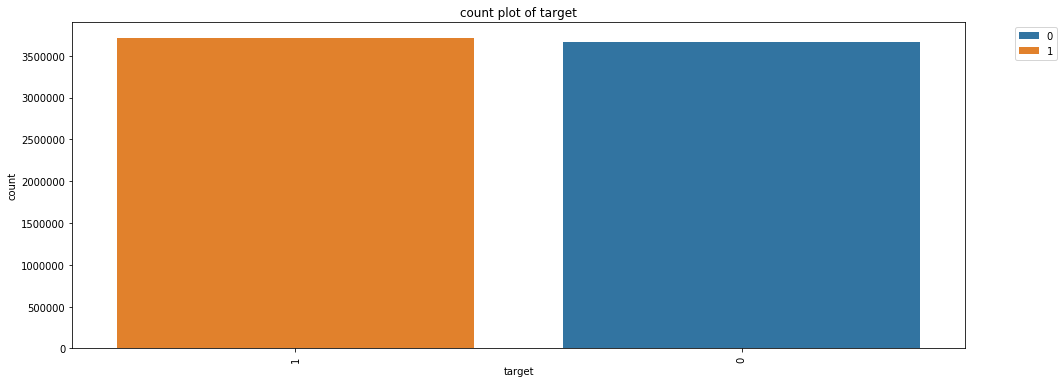

Unique value  : 2
Missing value : 0.0% (0)
Max value     : 1 (3714656-count)
Min value     : 0 (3662762-count)


In [ ]:
plot('target', 'target',data,'target' , info = True)

In [ ]:
print('Total rows :',data.shape[0])
class_one  = 3714656 * 100 / data.shape[0]
class_zero = 3662762 * 100 / data.shape[0]
print('class one  :{}%' .format(round(class_one ,2))) 
print('class zero :{}%'.format(round(class_zero,2)))

Total rows : 7377418
class one  :50.35%
class zero :49.65%


## Observation of count plot of target 
 * From above plot we can say that our dataset is balanced because difference between both class is low.

# **source_system_tab**

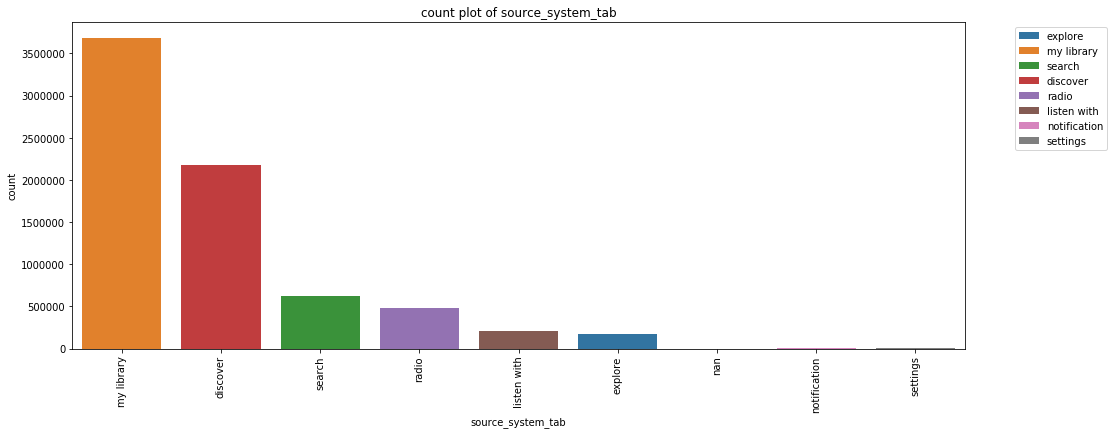

Unique value  : 9
Missing value : 0.34% (24849)
Max value     : my library (3684730-count)
Min value     : settings (2200-count)


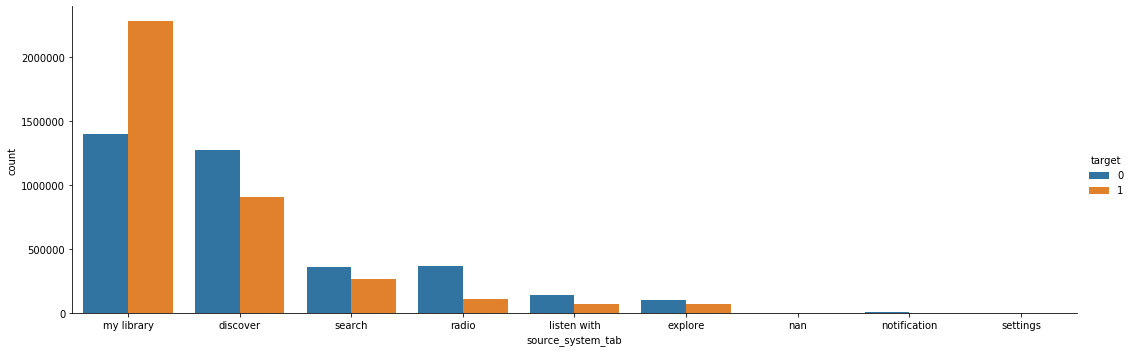

In [ ]:
plot('source_system_tab','target',data , 'source_system_tab' , info= True , catplot = True)

## Observation
#### Name of Feature : source_system_tab
#### source_system_tab :- The name of the tab where the event was triggered.
* category my library have highset count(occurrence) than other and category setting have much low occurrence in data.
* source_system_tab have 0.34% missing values.
* my_library have more count where target is 1.we can say that if user listen song on my library than there is high chance of user will listen that song again.
* if user listen song on discover or search than there is more chance user will not re-listen that song.

# **source_screen_name**

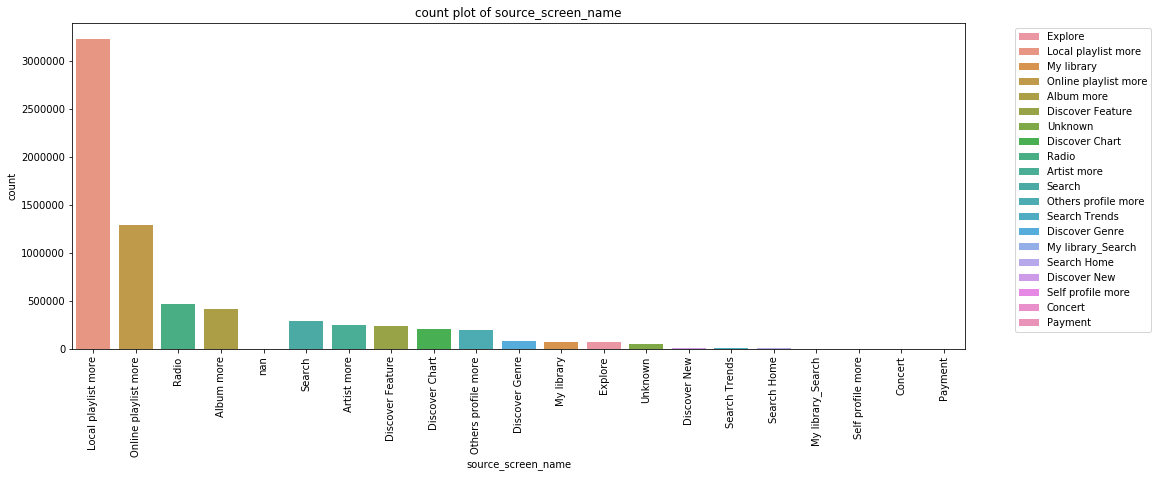

Unique value  : 21
Missing value : 5.62% (414804)
Max value     : Local playlist more (3228202-count)
Min value     : Payment (12-count)


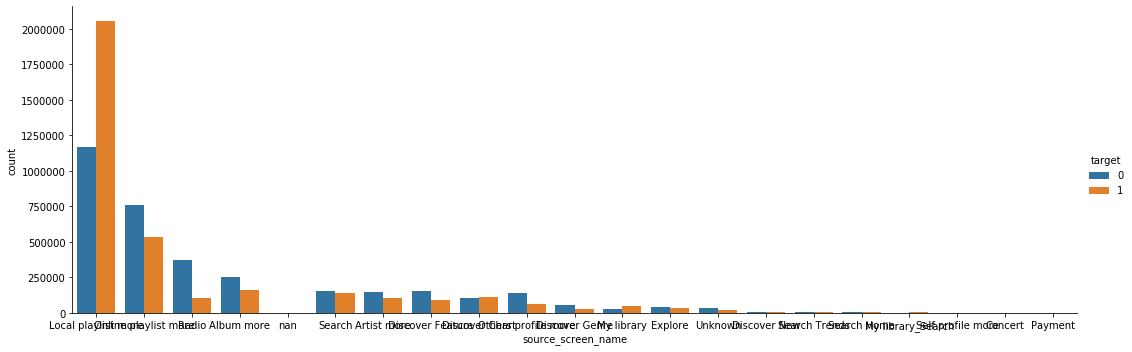

In [ ]:
plot('source_screen_name' , 'target',data,'source_screen_name' , info = True , catplot = True)

## Observation of count plot
#### Name of Feature : source_screen_name
#### source_screen_name :- name of the layout a user sees.
* In source_screen_name have 21 unique categories.
* Missing value rate of this feature is 5.62%.
* As we see in graph the highest counted category is 'local playlist more'.user more like to use 'local playlist more' category then other categories.
* Here if user listen song in 'local playlist more'(name of layout) than here is highest chance user will listen that song again.
* Minimum counted category is payment(only 12 counts out of 7M data).

# **source_type**

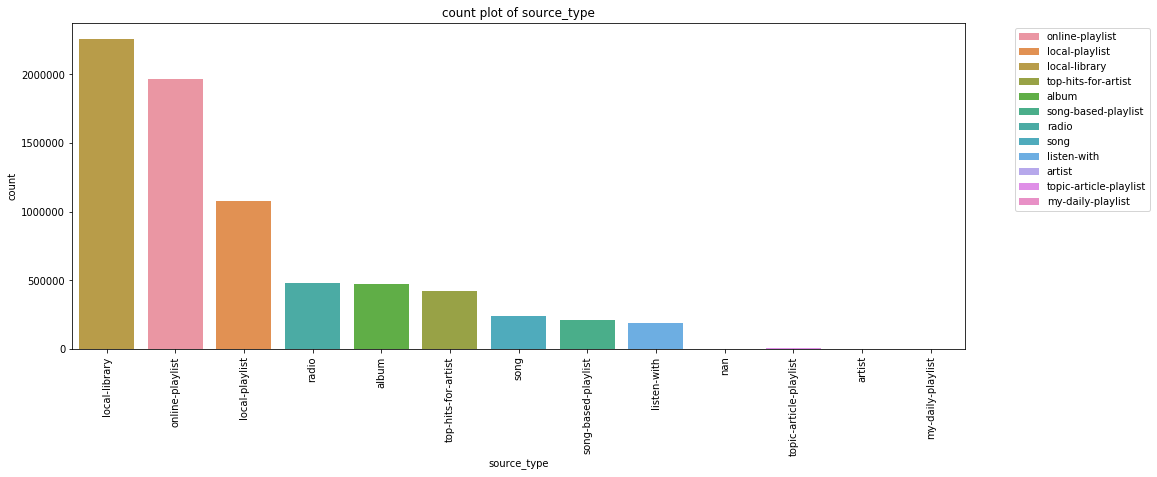

Unique value  : 13
Missing value : 0.29% (21539)
Max value     : local-library (2261399-count)
Min value     : my-daily-playlist (663-count)


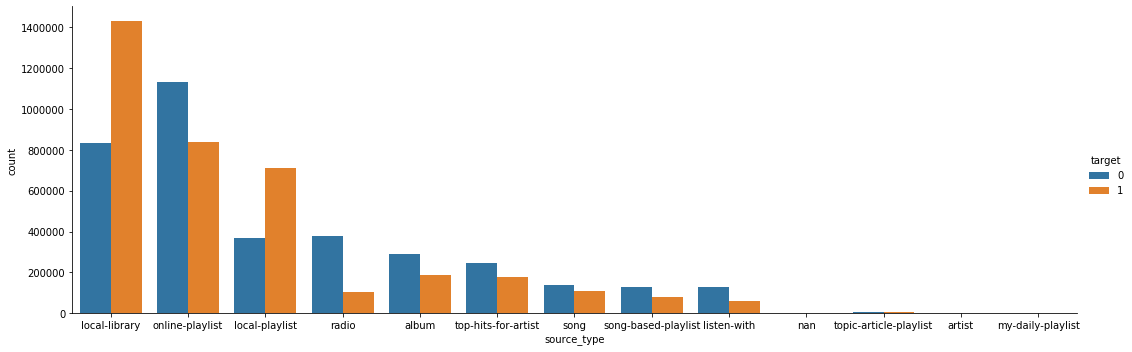

In [ ]:
plot('source_type' , 'target',data,'source_type' , info = True,catplot = True)

## Observation of count plot
#### Name of Feature : source_type
##### source_type :- An entry point a user first plays music on mobile apps.
* In this feature we have 13 unique categories.
* Missing value rate of this feature is 0.29%.
* As we see highest counted category is local_library.Here if user listen song in local-library or local-playlist than here is high chance user will re-listen that song.
* if user listen song in online-playlist than here is more chance of user will not re-listen that song.

# **registered_via**

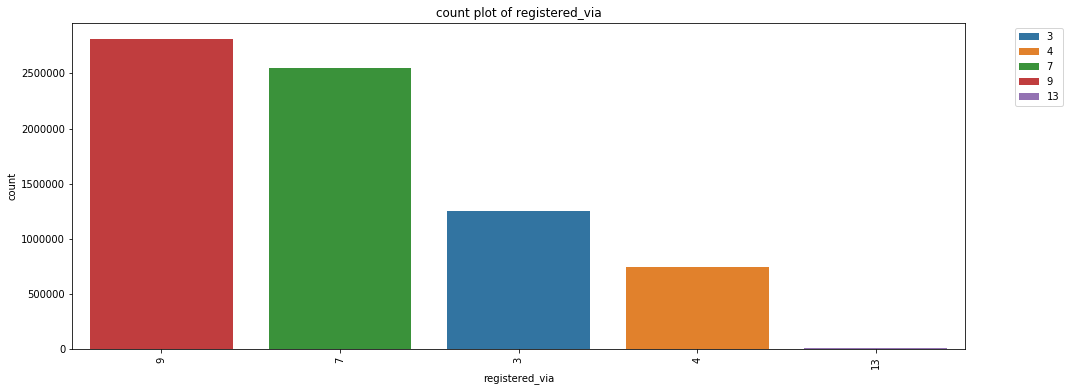

Unique value  : 5
Missing value : 0.0% (0)
Max value     : 9 (2814535-count)
Min value     : 13 (15099-count)


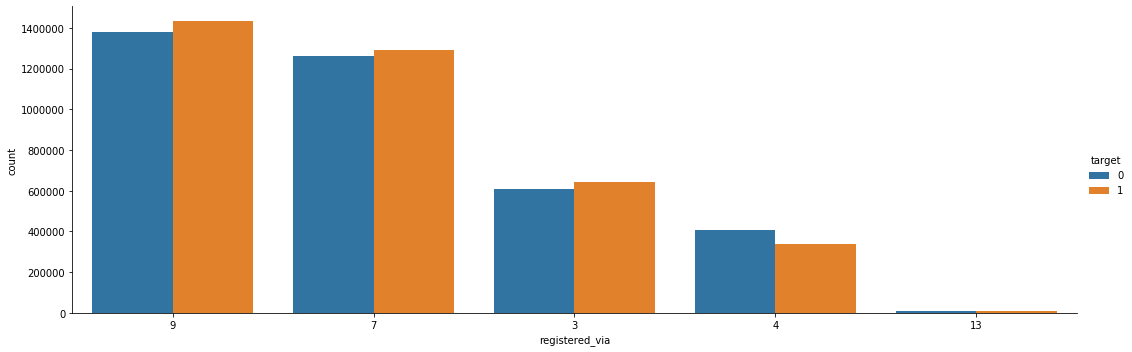

In [ ]:
plot('registered_via' , 'target',data ,'registered_via', info = True ,catplot = True)

## Observation of count plot
#### Name of Feature : registered_via
* In this feature we have 5 unique categories and no missing value .
* '13' category have occurring very often.

# **city**

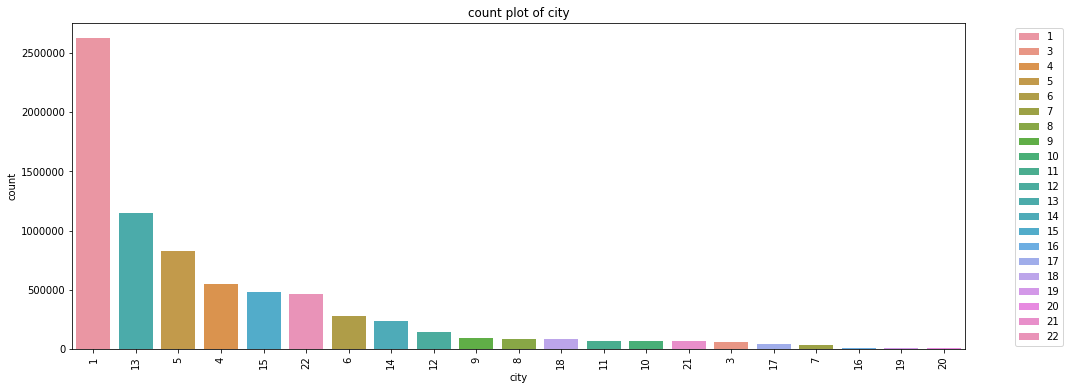

Unique value  : 21
Missing value : 0.0% (0)
Max value     : 1 (2621293-count)
Min value     : 20 (6093-count)


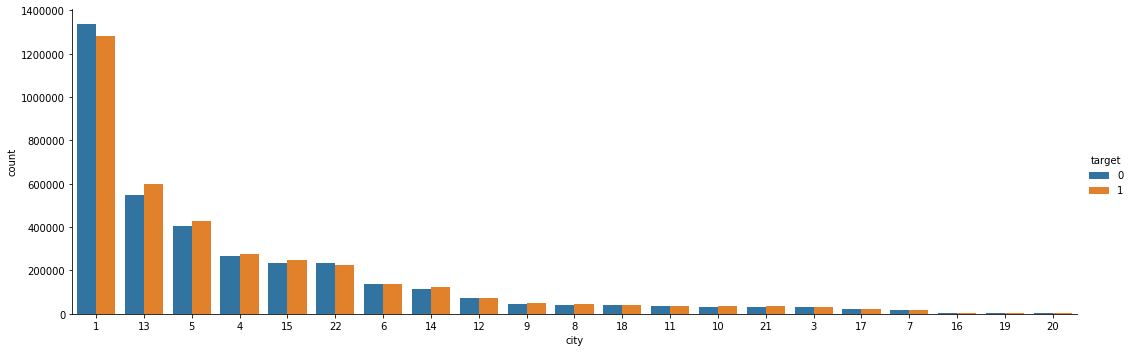

In [ ]:
plot('city', 'target',data , 'city' ,info = True , catplot = True) 

## Observation of count plot
#### Name of Feature : City
* In this feature we have 21 unique categories.
* In this feature we have no missing value.
* Most user are from city 1.
* Here all categories contribute nearly same to target value.

# **language**

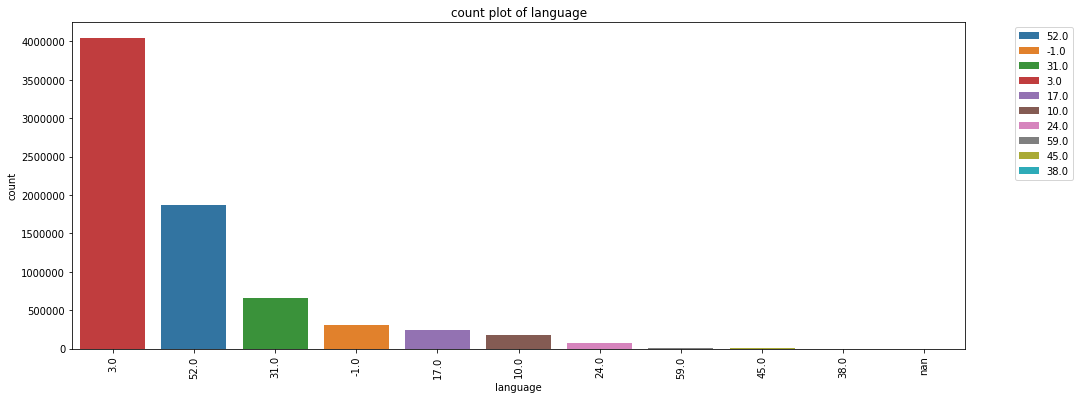

Unique value  : 11
Missing value : 0.0% (150)
Max value     : 3.0 (4044643-count)
Min value     : nan (150-count)


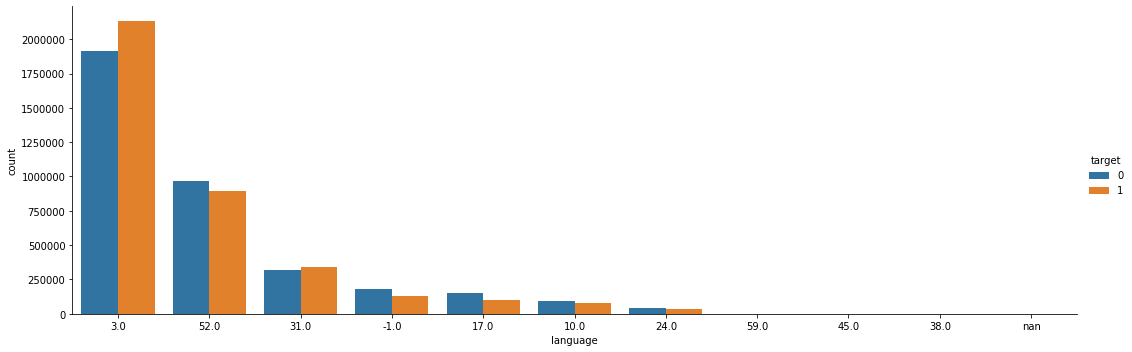

In [ ]:
plot('language' , 'target' ,data,'language', info = True , catplot = True)

## Observation of count plot
#### Name of Feature : language
* In language feature total 11 category we have.
* User are more like 3 and 52 language song.
* language are equally contributing target.
* Here we have nan category which have 150 count out of 7M.

# city vs language

<Figure size 1152x432 with 0 Axes>

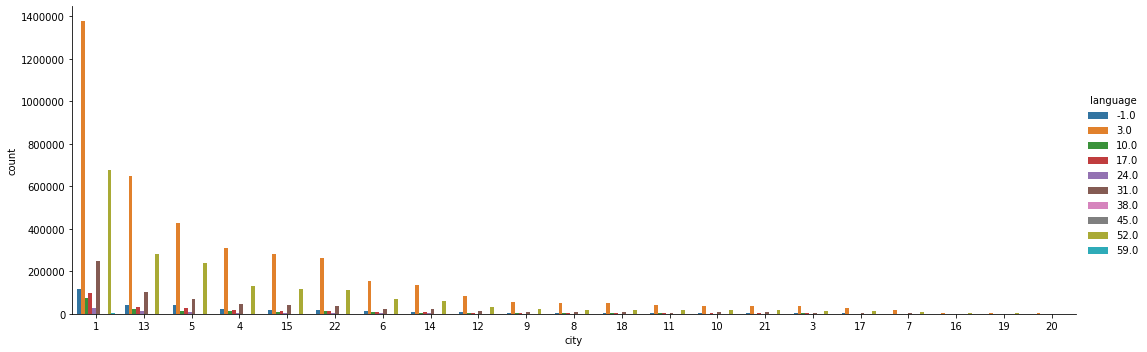

In [ ]:
plot('city','language',data,'city vs language',count = False , catplot = True )

<Figure size 1152x432 with 0 Axes>

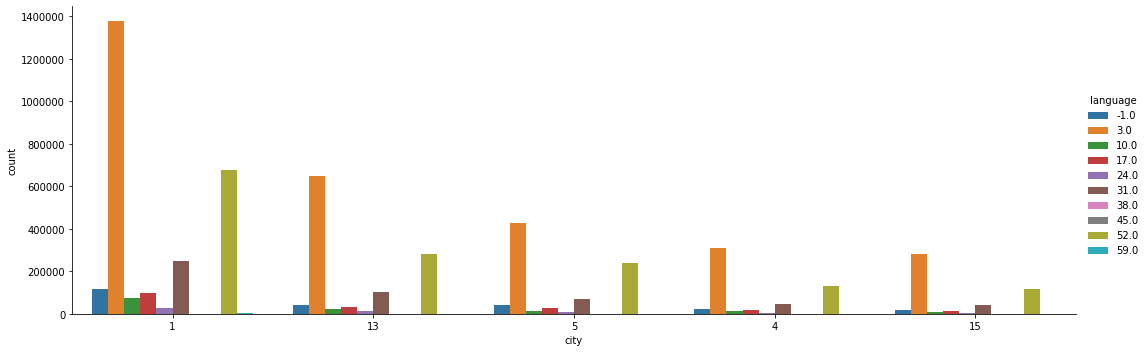

In [ ]:
plot('city','language',data,'city vs language',count = False , catplot = True , Top_cat = True)

## Observation
## city vs language
* First thing user are more listen language 3 and 52 across the cities.
* City 1 user are like to listen different language songs.
* City 1 have high count in language 3,52,31,-1 compare to all other cities.

# **gender**

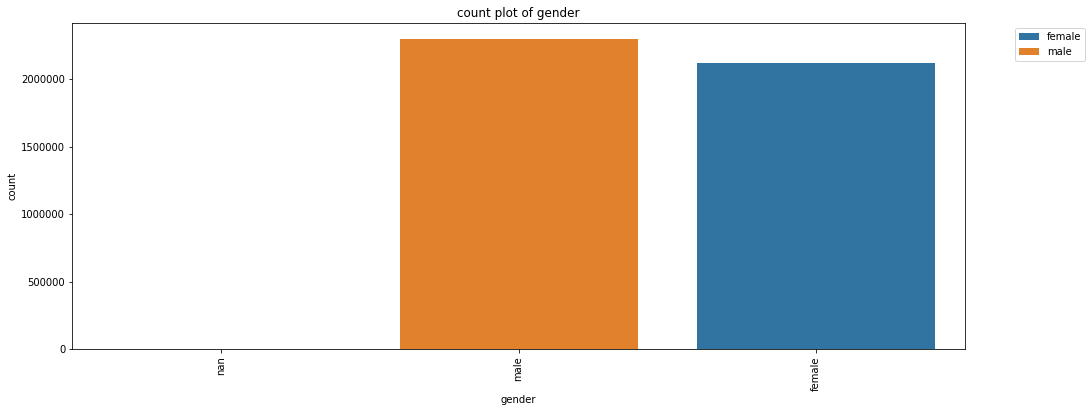

Unique value  : 3
Missing value : 40.14% (2961479)
Max value     : nan (2961479-count)
Min value     : female (2118316-count)


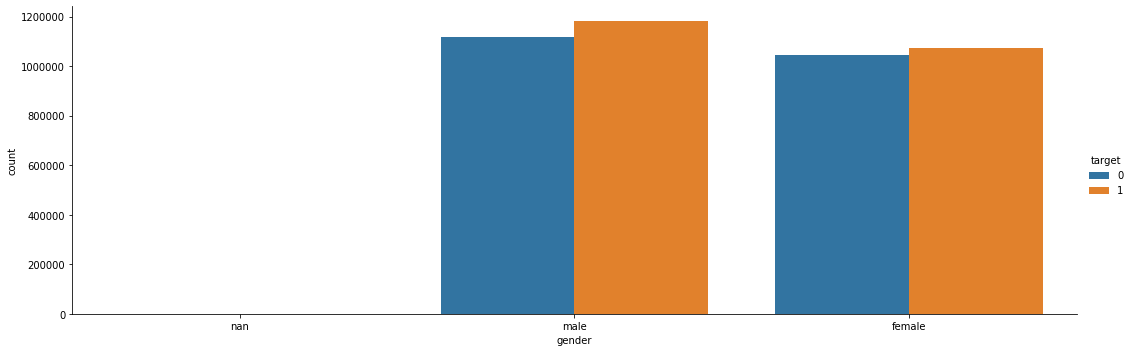

In [ ]:
plot('gender' , 'target' ,'gender', info = True , catplot = True)

Total Unique Categories : 21
How Many Top Categories you want to see :
10


<Figure size 1152x432 with 0 Axes>

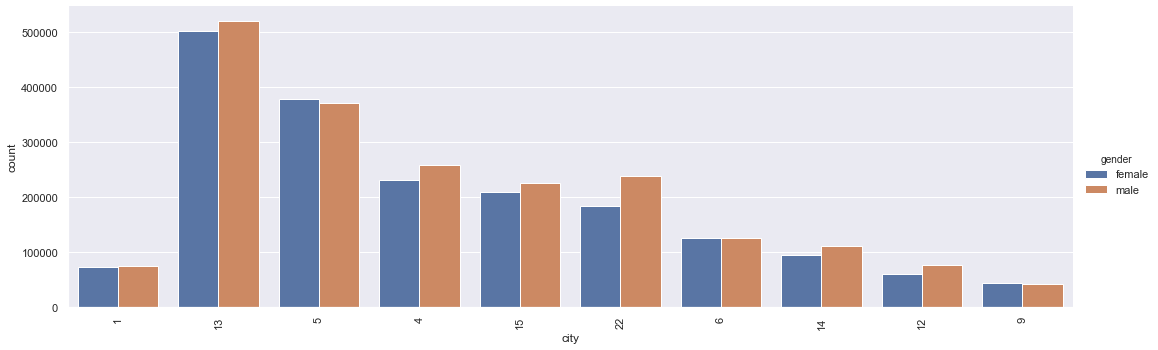

In [ ]:
plot('city','gender',data,'city vs gender',count = False , catplot = True , Top_cat = True)

## Observation of count plot
#### Name of Feature : gender
* This feature indicate gender of user.
* Here male and female user are nearly equal and both category equally contributing target value. 
* male & female equally distributed across cities.
* We have 40.14% nan values in this feature.

# **separate each genre**

In [ ]:
# seprate genre_ids and make seprate columns for each genre_ids
genre = data['genre_ids'].values
genre_category  = []

# seprate all genre and store in genre_category
for i in genre:
    lis = []
    i = str(i)
    if '|' in i:
        sen = i.split('|')
        genre_category.append(sen)
    else:
        lis.append(i)
        genre_category.append(lis)
# if len(genre) < 8 than fill 0 to make all len(genre) == 8        
genre_id_list = []
for i in genre_category:
    while len(i) < 8:
        i.append(0)
    genre_id_list.append(i)

genre_ids = np.array(genre_id_list)

# make seprate columns for all genre_ids 
data['one_genre']   = genre_ids[:,0]
data['two_genre']   = genre_ids[:,1] 
data['three_genre'] = genre_ids[:,2]
data['four_genre']  = genre_ids[:,3]
data['five_genre']  = genre_ids[:,4]
data['six_genre']   = genre_ids[:,5]
data['seven_genre'] = genre_ids[:,6]
data['eight_genre'] = genre_ids[:,7]

# Plot of each genre ids in songs

### 1st genre_id

Total Unique Categories : 159
Top Categories:
20


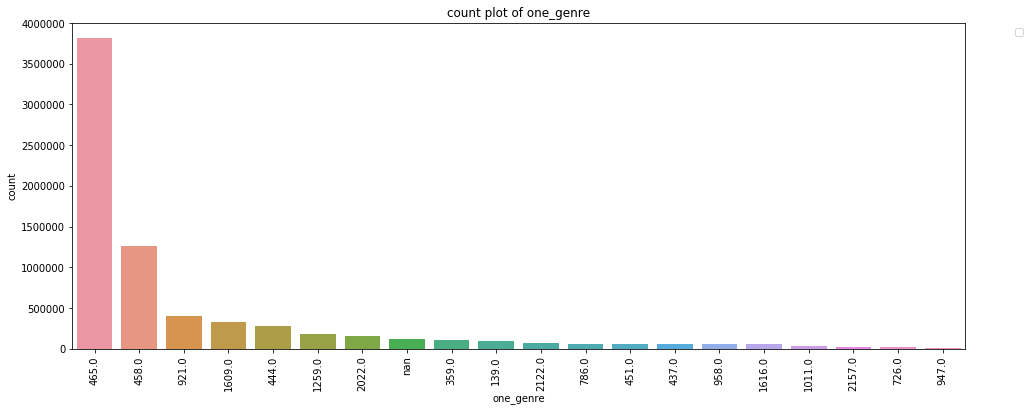

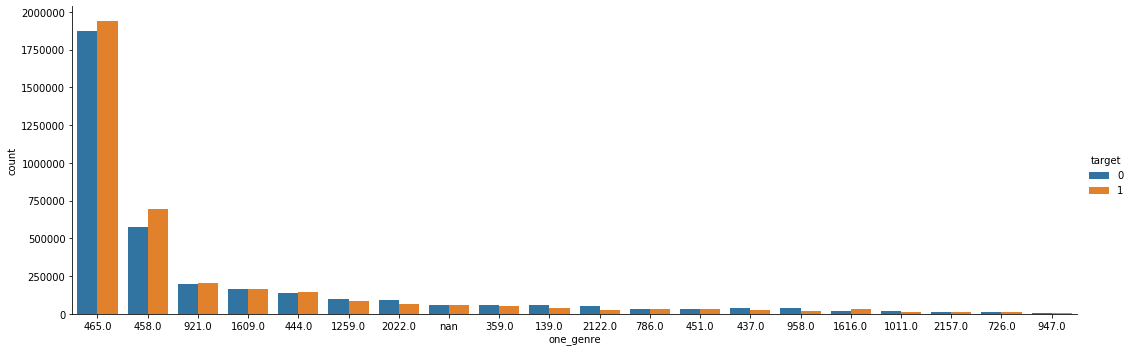

Unique value  : 159
Missing value : 0.0% (0)
Max value     : 465.0 (3814444-count)
Min value     : 779.0 (1-count)


In [ ]:
plot('one_genre','target',data,'one_genre', count = True , Top_cat = True , catplot = True , info = True)

## Observation
* Most songs have 465 and 456 genre ids
* First Genre equally contribute to target variable.

In [ ]:
#data['one_genre'].value_counts()

### 2nd genre_id

Total Unique Categories : 84
How Many Top Categories you want to see :
20


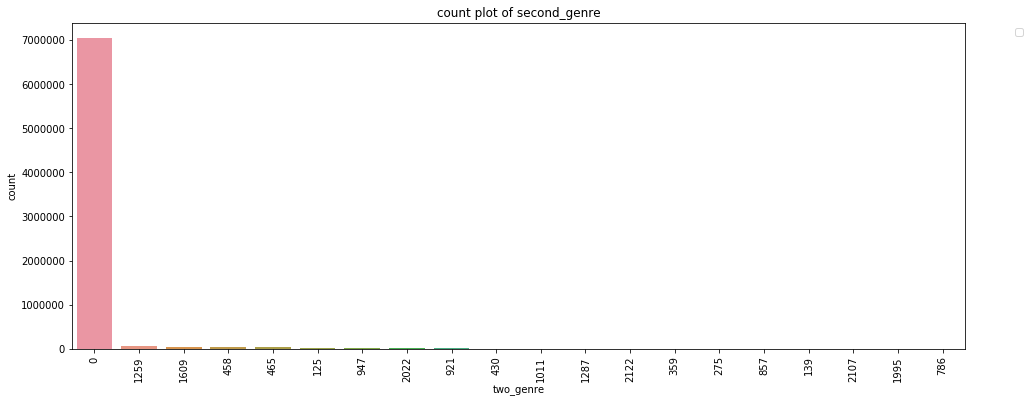

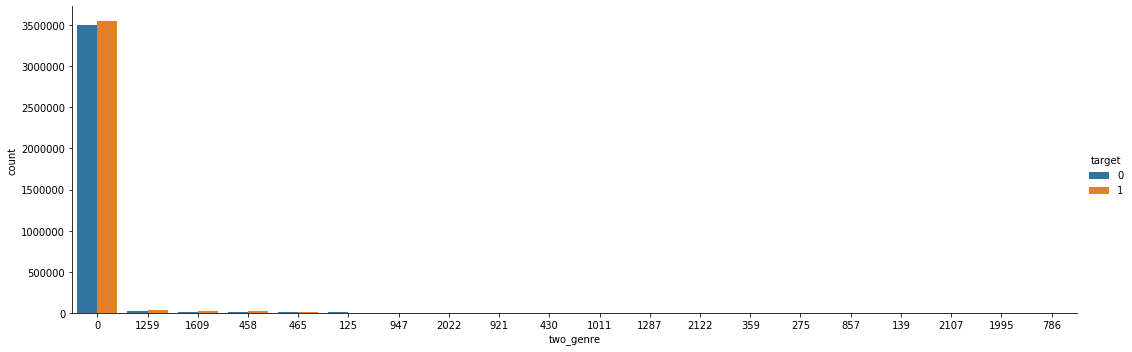

Unique value  : 84
Missing value : 0.0% (0)
Max value     : 0 (7037101-count)
Min value     : 2109 (1-count)


In [ ]:
plot('two_genre','target',data,'second_genre', count = True , Top_cat = True , catplot = True , info = True)

### Observation
* Most values are zero.
* zero equally contribute target variable.

### 3rd genre_id

Total Unique Categories : 35
How Many Top Categories you want to see :
20


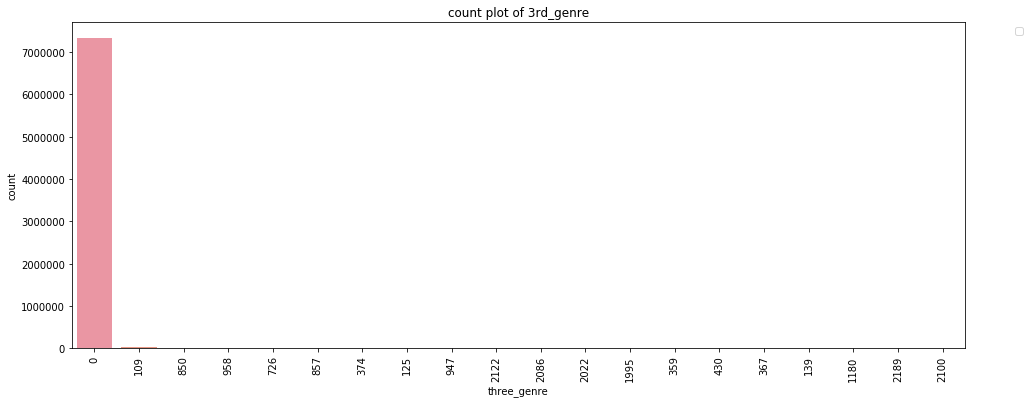

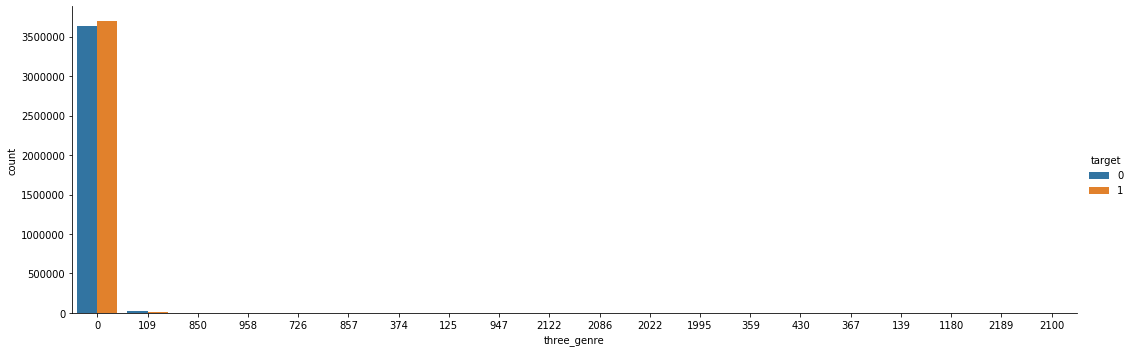

Unique value  : 35
Missing value : 0.0% (0)
Max value     : 0 (7335261-count)
Min value     : 444 (1-count)


In [ ]:
plot('three_genre','target',data,'3rd_genre', count = True , Top_cat = True , catplot = True , info = True)

In [ ]:
#data['three_genre'].value_counts()

In [ ]:
def count_unique_values(name):
    print('Column name : {}'.format(name))
    print()
    dic = Counter(data[name].values)
    #sort in deccending order by values
    dic = sorted(dic.items(), key=lambda x: x[1], reverse=True)
    for i in dic[:7]:
        print('Id  {}  have total  {}  values.'.format(i[0],i[1]) )

### After 2nd genre most values are zero so it is better to see numbers instead of plot.

In [ ]:
for i in data.columns[-9:-1]:
    count_unique_values(i)
    print('-'*30)

Column name : one_genre

Id  465.0  have total  3814444  values.
Id  458.0  have total  1266910  values.
Id  921.0  have total  400596  values.
Id  1609.0  have total  329134  values.
Id  444.0  have total  280278  values.
Id  1259.0  have total  182089  values.
Id  2022.0  have total  154697  values.
------------------------------
Column name : two_genre

Id  0  have total  7037101  values.
Id  1259  have total  69734  values.
Id  1609  have total  44981  values.
Id  458  have total  44423  values.
Id  465  have total  33634  values.
Id  125  have total  28041  values.
Id  947  have total  18112  values.
------------------------------
Column name : three_genre

Id  0  have total  7335261  values.
Id  109  have total  30710  values.
Id  850  have total  5666  values.
Id  958  have total  1306  values.
Id  726  have total  1034  values.
Id  857  have total  619  values.
Id  374  have total  588  values.
------------------------------
Column name : four_genre

Id  0  have total  7368943 

In [ ]:
# data.shape[0] = total data
# 7335261  = zero count of 3rd genre

print(data.shape[0] - 7335261,'songs have > 3 genre.')

42157 songs have > 3 genre.


### Observation of Genre_ids:

* Most Song have Only one genre_id.
* In First genre of song most unique(159) genre ids are present.
* Max songs have 465 genre_id.
* Second most genre of song is 458.

* In second genre ids most counted genre is zero than after 1259 , 1609 , 458 etc.
* second genre ids contains 84 unique genre ids.


* 0.3M Songs have 2 genre.
* 42K songs have > 3 genre.
* After 2 gerne many values are zeros.
* As you see above Id 0 means there is no any genre.
* out of top 3 genre we have most values are zeros.but all zeros are equally contributes to target.
* Only 213 songs have total 8 genre ids.
* genre is most important feature for music.so we will keep.


# first genre vs language

Total Unique Categories : 159
How Many Top Categories you want to see :
10


<Figure size 1152x432 with 0 Axes>

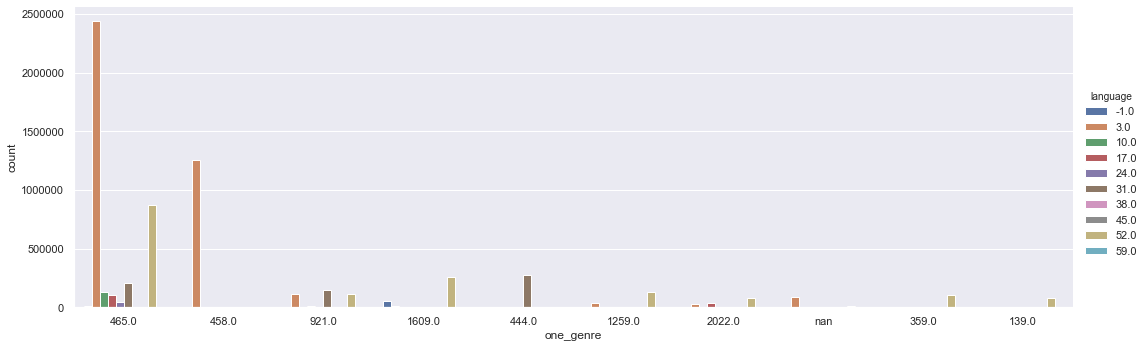

In [ ]:
plot('one_genre','language',data,'language vs one_genre',count = False , catplot = True , Top_cat = True )

### Observation 
* language 3,52,31,10,17 are belongs to 465 genre.
* genre 465 have more langauge songs than others.
* genre 458 have only one language 3.
* genre 444 have only one language 31.

# first genre vs gender

Total Unique Categories : 159
How Many Top Categories you want to see :
10


<Figure size 1152x432 with 0 Axes>

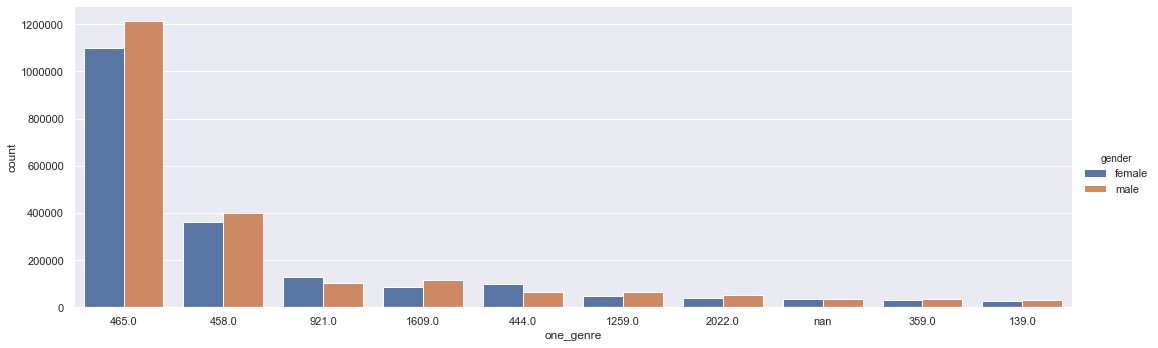

In [ ]:
plot('one_genre','gender',data,'one_genre vs gender',count = False , catplot = True , Top_cat = True )

### Observation 
* In genre 465 and 458 have little more male user than female.
* Genre 444 have little more female user than male.
* After all user's gender are nearly same.

# ***EDA of Numeric Data***

# Analysis of bd(age of user)

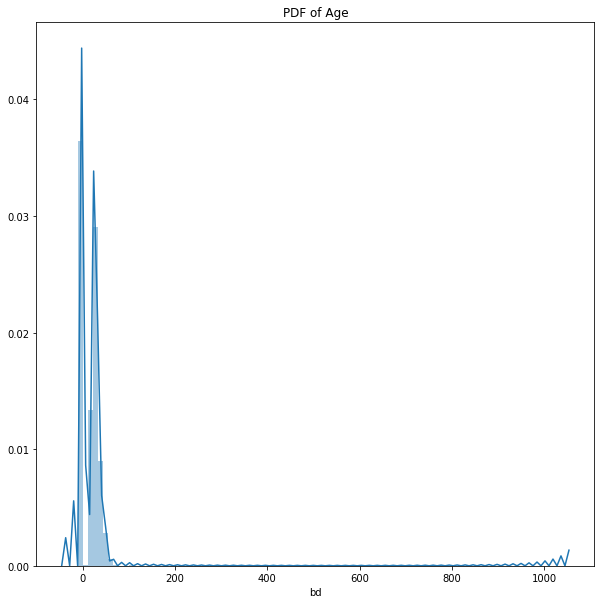

In [ ]:
plt.figure(figsize = (10,10))
ax = sns.distplot(data['bd'], bins = 100,hist = True)
#h,l = ax.get_legend_handles_labels()
#ax.legend(h ,l,bbox_to_anchor=(1.05, 1) ,loc = 'upper left')
#plt.setp(ax.get_xticklabels() , rotation = 90 )
plt.title('PDF of {}'.format("Age"))
plt.show()

In [ ]:
for i in range(10,110,10):
    print("{}th Percentile of age : {}".format(i,np.percentile(data['bd'],i)))
    if i == 100:
        print('='*30)
        print()
        print('='*30)
        for i in range(90,101):
            print("{}th Percentile of age : {}".format(i,np.percentile(data['bd'],i)))

print('='*30)
print()
print('='*30)
i = 99
while i < 99.9:
    i += 0.1
    print("{}th Percentile of age : {}".format(round(i,2),np.percentile(data['bd'],round(i,2))))

10th Percentile of age : 0.0
20th Percentile of age : 0.0
30th Percentile of age : 0.0
40th Percentile of age : 15.0
50th Percentile of age : 21.0
60th Percentile of age : 24.0
70th Percentile of age : 27.0
80th Percentile of age : 30.0
90th Percentile of age : 36.0
100th Percentile of age : 1051.0

90th Percentile of age : 36.0
91th Percentile of age : 37.0
92th Percentile of age : 38.0
93th Percentile of age : 39.0
94th Percentile of age : 40.0
95th Percentile of age : 42.0
96th Percentile of age : 44.0
97th Percentile of age : 46.0
98th Percentile of age : 50.0
99th Percentile of age : 54.0
100th Percentile of age : 1051.0

99.1th Percentile of age : 55.0
99.2th Percentile of age : 55.0
99.3th Percentile of age : 56.0
99.4th Percentile of age : 58.0
99.5th Percentile of age : 59.0
99.6th Percentile of age : 60.0
99.7th Percentile of age : 63.0
99.8th Percentile of age : 66.0
99.9th Percentile of age : 82.0
100.0th Percentile of age : 1051.0


## Observation of PDF and CDF
#### Name of Feature : bd(age)
* Most age are zero.
* Some age is less than zero.
* Age featuare contain outliers because we know that age is always positive and lifespan of human is not more than 80-100.
* From percentile values 99 % user have less than 54 age.only 1% user have above 54 age.
* More precise 99.9 % user's age below 82 and only 0.1% user's age > 82.

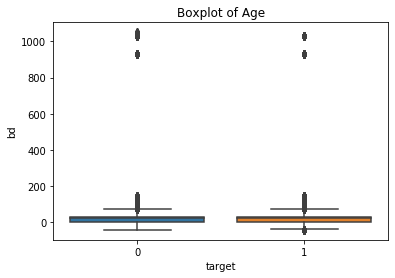

In [ ]:
sns.boxplot(x = 'target' , y = 'bd' , data = data)
plt.title('Boxplot of {}'.format("Age"))
plt.show()

## Observation of boxplot
#### Name of Feature : bd(age of user)
* In feature some points are more than 800.
* We consider those points as outliers.

# Analysis of registration_time

In [ ]:
data['registration_init_time'] = data['registration_init_time'].astype(str)
#take first 4 latter
data['registration_year'] = [x[:4] for x in data['registration_init_time']]
#convert datatype into int
data['registration_year'] = data['registration_year'].astype(int)

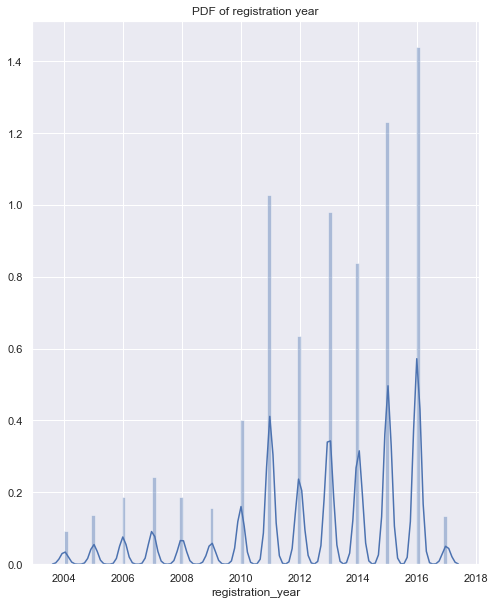

In [ ]:
plt.figure(figsize = (8,10))
sns.set()
sns.distplot(data['registration_year'],bins = 100,hist = True)
plt.title('PDF of registration year')
plt.show()

## Observation of PDF
#### Name of Feature : registration year(Extracted Feature from registration_init_time)
* After 2010 more user start registration,
* Highest registration happen in 2016.


# 1st plot  - year     vs registration_count 
#### 2nd plot - month vs registration_count
#### 3nd plot - day      vs registration_count

In [ ]:
#!pip install tqdm
''' Extract year(2016) , month , day from registration_init_time '''
from tqdm import tqdm
month = []
date = []
year = []
for i in tqdm(data['registration_init_time']):
    #print(i.dtype)
    #print(i[6:])
    year.append(int(i[:4]))
    if i[:4] == '2016':
        month.append(int(i[4:6]))
        date.append(int(i[6:]))

100%|████████████████████████████████████████████████████████████████████| 7377418/7377418 [00:17<00:00, 422960.52it/s]


In [ ]:
year = {'year':year}
y_data = pd.DataFrame(data = year)

d = {'month':month , 'date':date}
registration_time = pd.DataFrame(data = d)

In [ ]:
def count_values(registration_time,name):
    ''' 
    input  = dataframe , column_name
    output = x,y 
    x = unique value in column
    y = count of each unique word'''
    
    dic = Counter(registration_time[name].values)
    #sort by keys
    d = sorted(dic.items())
    x, y = [],[]
    for i,j in d:
        x.append(i)
        y.append(j)
    return x,y

In [ ]:
x_y,y_y = count_values(y_data , 'year')
x_m,y_m = count_values(registration_time,'month')
x_d,y_d = count_values(registration_time,'date')

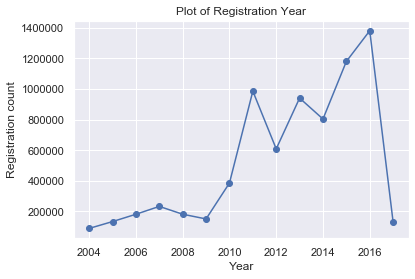

In [ ]:
plt.scatter(x_y,y_y)
plt.plot(x_y,y_y)
plt.title('Plot of Registration Year')
plt.xlabel('Year')
plt.ylabel('Registration count')
plt.show()

## Observation of plot
#### Year vs Registration count
* After 2009 Registration is increase drastically.
* In 2016 highest Registration happen.

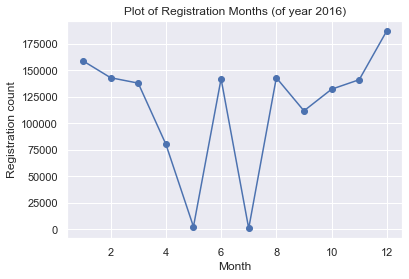

In [ ]:
plt.scatter(x_m,y_m)
plt.plot(x_m,y_m)
plt.title('Plot of Registration Months (of year 2016)')
plt.xlabel('Month')
plt.ylabel('Registration count')
plt.show()

## Observation of plot
#### Month vs Registration count
* As we know highest registration happend in 2016 than which month have highest count?
* Highest counted month is December-2016.
* In month 5 and 7 lowest register happen.
* Starting 5 months count is decresing and after 9 month count start increasing.

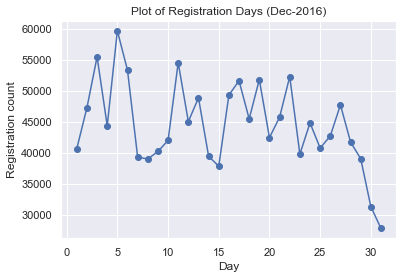

In [ ]:
plt.scatter(x_d,y_d)
plt.plot(x_d,y_d)
plt.title('Plot of Registration Days (Dec-2016)')
plt.xlabel('Day')
plt.ylabel('Registration count')
plt.show()

## Observation of plot
#### Day vs Registration count
* 5-Dec-2016 Highest Registration Counted.
* After 26 date count start decreasing.

# Analysis of expiration_date
#### 1st plot  - year vs expire_count
#### 2nd plot - month vs expire_count
#### 3nd plot - day vs expire_count

In [ ]:
data['expiration_date'] = data['expiration_date'].astype(str)

''' Extract year from Expire_date '''
year = []
for i in tqdm(data['expiration_date']):
    year.append(int(i[:4]))

100%|████████████████████████████████████████████████████████████████████| 7377418/7377418 [00:08<00:00, 878344.16it/s]


In [ ]:
year = {'year':year}
y_data = pd.DataFrame(data = year)
#d = {'month':month , 'date':date}
#expiration_time = pd.DataFrame(data = d)

x_y,y_y = count_values(y_data , 'year')
#x_m,y_m = count_values(expiration_time,'month')
#x_d,y_d = count_values(expiration_time,'date')

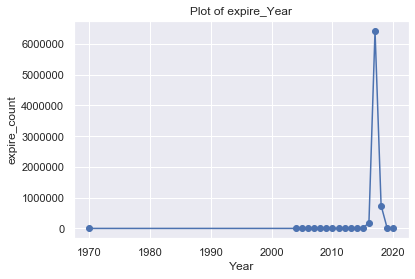

In [ ]:
plt.scatter(x_y,y_y)
plt.plot(x_y,y_y)
plt.title('Plot of expire_Year')
plt.xlabel('Year')
plt.ylabel('expire_count')
plt.show()

In [ ]:
ymax = max(y_y)
xmax = x_y[y_y.index(ymax)]
print('In the year {} most subscription expire.'.format(xmax))
print('Expire count of year {} is {}.'.format(xmax,ymax))

In the year 2017 most subscription expire.
Expire count of year 2017 is 6426684.


## Observation of expire_year 
#### year vs expire_count 
* In the year 2017 most subscription expire.
* Expire count of year 2017 is 6426684.

In [ ]:
#!pip install tqdm
''' Extract month , day from expire date '''
month = []
date = []
for i in tqdm(data['expiration_date']):
    if i[:4] == '2017':
        month.append(int(i[4:6]))
        date.append(int(i[6:]))

100%|████████████████████████████████████████████████████████████████████| 7377418/7377418 [00:19<00:00, 388217.84it/s]


In [ ]:
d = {'month':month , 'date':date}
expiration_time = pd.DataFrame(data = d)

x_m,y_m = count_values(expiration_time,'month')
x_d,y_d = count_values(expiration_time,'date')

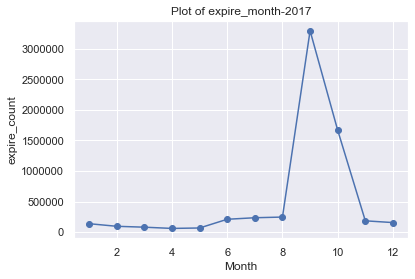

In [ ]:
sns.set()
plt.scatter(x_m,y_m)
plt.plot(x_m,y_m)
plt.title('Plot of expire_month-2017')
plt.xlabel('Month')
plt.ylabel('expire_count')
plt.show()

##  Observation
#### Month vs expire_count
* In 9th month of 2017 most user's pack is expired.

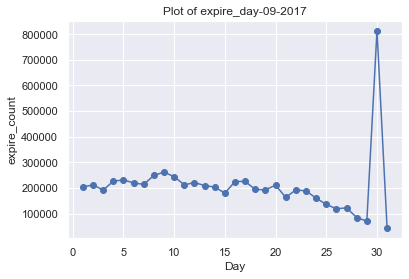

In [ ]:
plt.scatter(x_d,y_d)
plt.plot(x_d,y_d)
plt.title('Plot of expire_day-09-2017')
plt.xlabel('Day')
plt.ylabel('expire_count')
plt.show()

##  Observation
#### Day vs expire_count
* In 30-09-2017 most user's pack was expired.

#  **Analysis of Song_length**

In [ ]:
data['length_min'] = data['song_length']

data['length_min'] = data['length_min'].div(60000)
#data['length_min'] = data['length_min'].round(2)

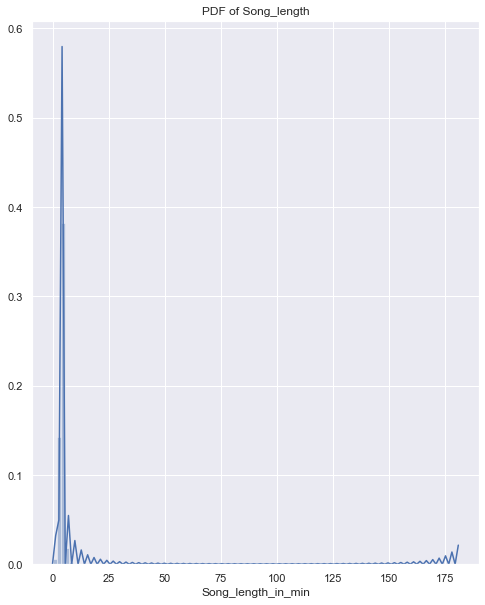

In [ ]:
plt.figure(figsize = (8,10))
sns.set()
sns.distplot(data['length_min'],bins = 100,hist = True)
plt.title('PDF of Song_length')
plt.xlabel('Song_length_in_min')
plt.show()

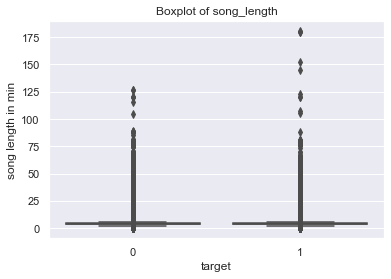

In [ ]:
sns.boxplot(x = 'target' , y = 'length_min' , data = data)
plt.title('Boxplot of {}'.format("song_length"))
plt.ylabel('song length in min')
plt.show()

In [ ]:
for i in range(10,110,10):
    percentage = round(np.percentile(data['length_min'],round(i,2)) , 2 ) 
    print("{}th Percentile of length  : {}".format(round(i,2),percentage))
    if i == 100:
        print('='*30)
        print()
        print('='*30)
        for i in range(90,101):
            percentage = round(np.percentile(data['length_min'],round(i,2)) , 2 ) 
            print("{}th Percentile of length  : {}".format(round(i,2),percentage))

print('='*30)
print()
print('='*30)
i = 99
while i < 99.9:
    i += 0.1
    percentage = round(np.percentile(data['length_min'],round(i,2)) , 2 ) 
    print("{}th Percentile of length  : {}".format(round(i,2),percentage))

10th Percentile of length  : 3.19
20th Percentile of length  : 3.47
30th Percentile of length  : 3.67
40th Percentile of length  : 3.85
50th Percentile of length  : 4.03
60th Percentile of length  : 4.22
70th Percentile of length  : 4.43
80th Percentile of length  : 4.67
90th Percentile of length  : 4.97
100th Percentile of length  : 180.86

90th Percentile of length  : 4.97
91th Percentile of length  : 5.01
92th Percentile of length  : 5.07
93th Percentile of length  : 5.13
94th Percentile of length  : 5.2
95th Percentile of length  : 5.32
96th Percentile of length  : 5.42
97th Percentile of length  : 5.57
98th Percentile of length  : 5.88
99th Percentile of length  : 6.6
100th Percentile of length  : 180.86

99.1th Percentile of length  : 6.73
99.2th Percentile of length  : 6.85
99.3th Percentile of length  : 7.09
99.4th Percentile of length  : 7.37
99.5th Percentile of length  : 7.66
99.6th Percentile of length  : 8.16
99.7th Percentile of length  : 8.76
99.8th Percentile of length 

In [ ]:
max_len_song = data[['name','length_min']][data['length_min'] > 100]
print(max_len_song)

                                                      name  length_min
420200   Monstercat Podcast EP. 127 (2016 Mix Contest F...      122.86
1335626  A Gentle Calm: Calming Music for Deep Sleep an...      144.66
1337872  Monstercat Podcast EP. 087 (Threshold Album Sp...      120.32
1338616                      Sleep Zzzone Meditation Music      180.00
2020722  Falling Asleep: Gentle Sleep Music with Harp S...      180.86
2055330                Deep Relaxing Sleep Music (3 Hours)      180.00
2704180  The Finest Of Chill House Lounge by DJ Jondal ...      107.48
4728853                   Guided Meditation for Deep Sleep      120.00
4728854  Guided Meditation for Deep Sleep: Sleeping wit...      120.00
5058223  Progressive House 2017 Top 100 Hits DJ Mix (1h...      126.26
5095294                            Monstercat Best of 2012      105.55
5107469  Edm Workout Music Hits 2016 (Top 100 Dubstep +...      120.11
5164302  Monstercat Podcast EP. 087 (Threshold Album Sp...      120.32
547258

## Observation OF song_length
#### Feature Name : length_min (Created Feature from song_length)
* In this feature i divide song_length / 60000.why 60000?  because song_length is in ms and for better understanding i  convert into minutes..
* 50% song length is less than 4.03 and 90% song length is less than 4.97%.
* 99.9 % song length is less than 12.85 min and only 1% song length are upto 180.86 min.
* That 1% song is padcast , Deep sleep Music , Meditation , Workout Music ,  Album mix etc.

# Analysis of Song length vs target vs gender

In [ ]:
max_len_song = data[['name','length_min','target','gender']][data['length_min'] > 12]
print(max_len_song.shape)

(9366, 4)


### song length(> 12 min ) vs target

<Figure size 1872x720 with 0 Axes>

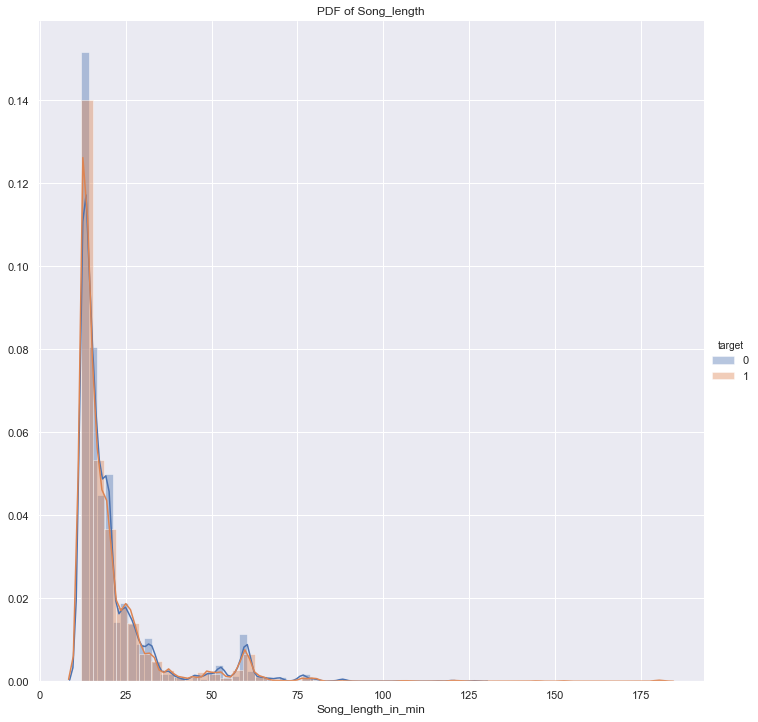

In [ ]:
plt.figure(figsize = (26,10))
sns.set()
sns.FacetGrid(max_len_song , hue = 'target' ,height = 10) \
    .map(sns.distplot , 'length_min') \
    .add_legend();
    
plt.title('PDF of Song_length')
plt.xlabel('Song_length_in_min')
plt.show()

### song length(> 12 min) vs gender

<Figure size 1872x720 with 0 Axes>

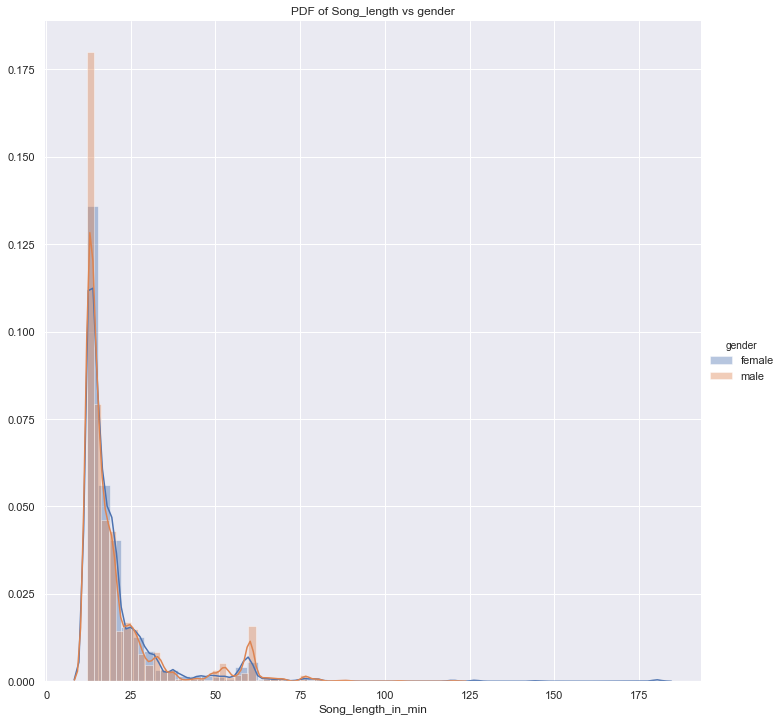

In [ ]:
plt.figure(figsize = (26,10))
sns.set()
sns.FacetGrid(max_len_song , hue = 'gender' ,height = 10) \
    .map(sns.distplot , 'length_min') \
    .add_legend();
    
plt.title('PDF of Song_length vs gender')
plt.xlabel('Song_length_in_min')
plt.show()

## Observation
* song which length > 50 have very less count in data.
* song length have equally distribute target.
* song_length vs  gender where there is not big diffrence

# song length( > 50 min )

In [ ]:
max_len_song = data[['name','length_min','target','gender']][data['length_min'] > 50]
#print(max_len_song.shape)

Total Unique Categories : 173
How Many Top Categories you want to see :
80


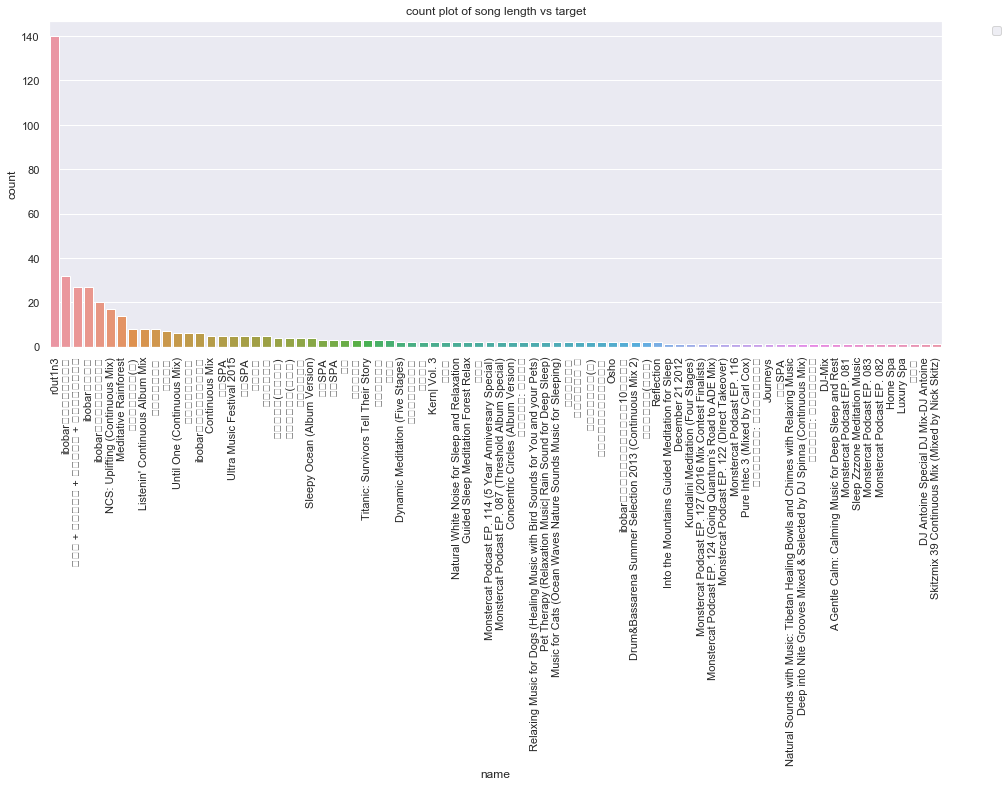

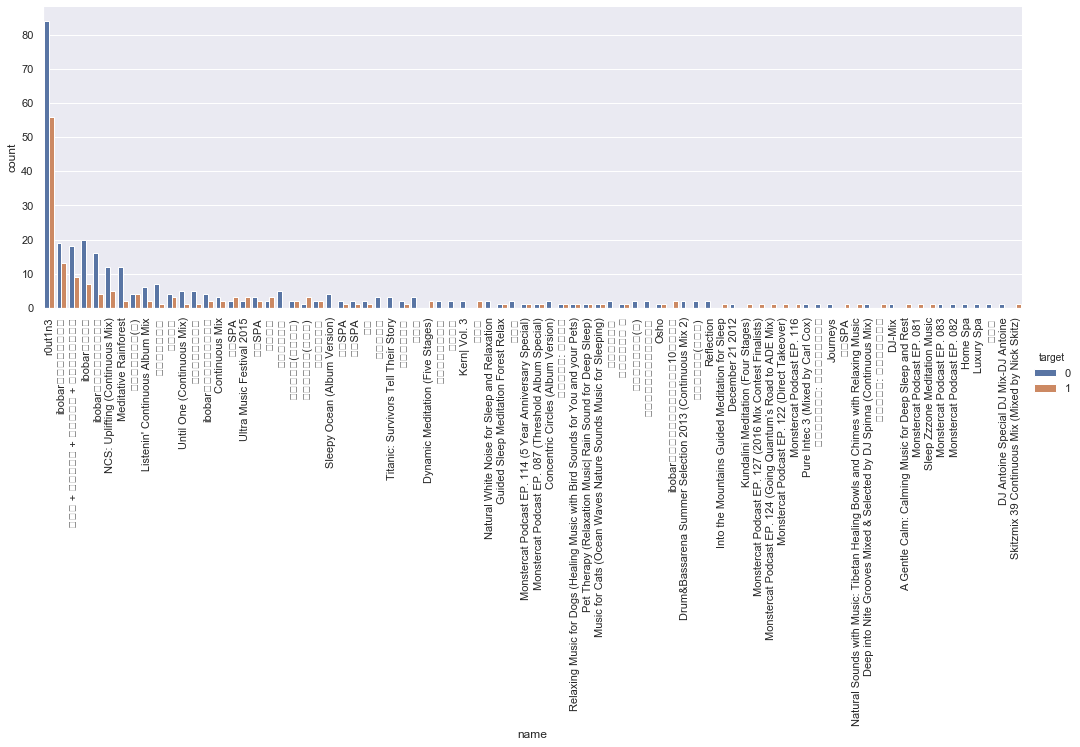

Unique value  : 173
Missing value : 0.0% (0)
Max value     : r0ut1n3 (140-count)
Min value     : 慈經(大悲經) (1-count)


In [ ]:
plot('name','target',data,max_len_song , 'song length vs target',info = True,count = True , catplot = True , Top_cat = True)

## Observation
* 173 song have > 50 min length.
* r0ut1n3 song listen 140 times and outoff that all song listen < 20 times.
* songs not relisten much which have > 50 min length.

# song length( > 80 min ) 

In [ ]:
max_len_song = data[['name','length_min','target','gender']][data['length_min'] > 80]
print(max_len_song.shape)
#max_len_song.head()

(33, 4)


Total Unique Categories : 27
How Many Top Categories you want to see :
30


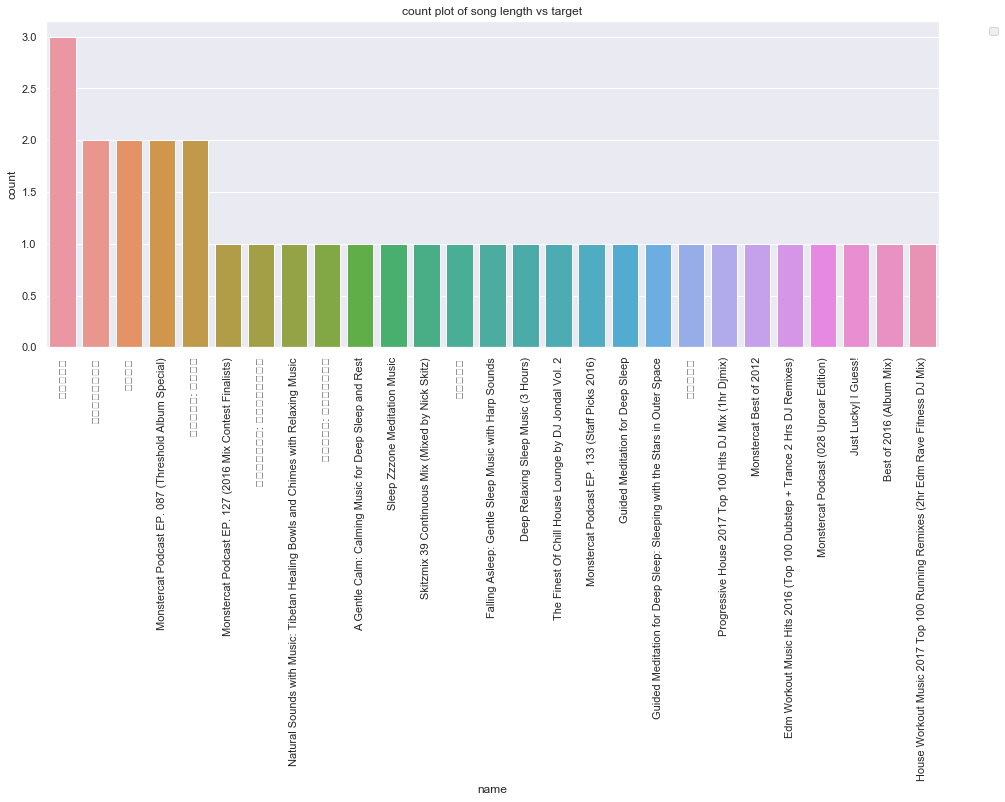

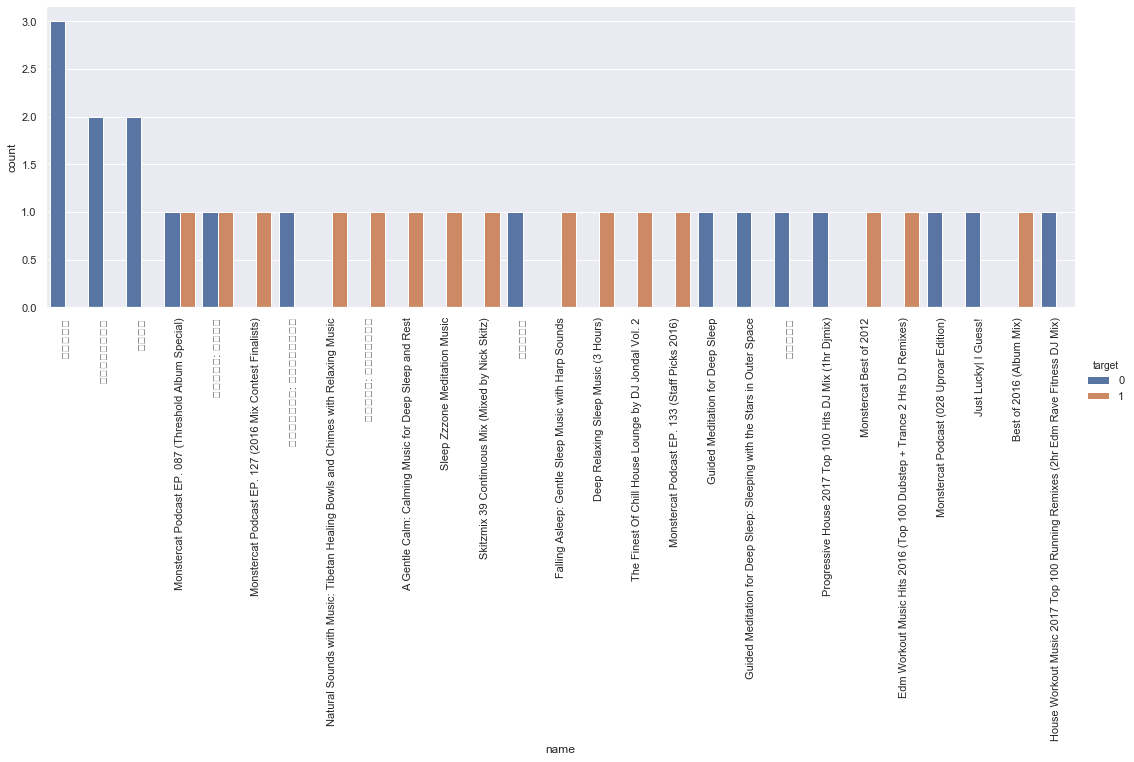

Unique value  : 27
Missing value : 0.0% (0)
Max value     : 雷聲和降雨 (3-count)
Min value     : House Workout Music 2017 Top 100 Running Remixes (2hr Edm Rave Fitness DJ Mix) (1-count)


In [ ]:
plot('name','target',data,max_len_song , 'song length vs target',info = True,count = True , catplot = True , Top_cat = True)

## Observation
* Only 27 songs have > 80 min length.
* 15 songs have relisten only one time by user.

# Analysis of Song
## Top 50 Song - User's like to listen that song.

In [ ]:
# plot top 50 song name by there count
dic = Counter(data['name'].values)
#sort in deccending order by values
dic = sorted(dic.items(), key=lambda x: x[1], reverse=True)

#get name of sorted dic
x , y = [] , []
for name in dic[:50]:
    x.append(name[0])
    y.append(name[1])
# x = name of song
# y = count of song

# In '()' words is traslation of chinese language
# this code return english laguage if it is given
song_name = []
for i in x:
    i = i.split('(')
    i = i[-1].replace(')' , "")
    song_name.append(i)

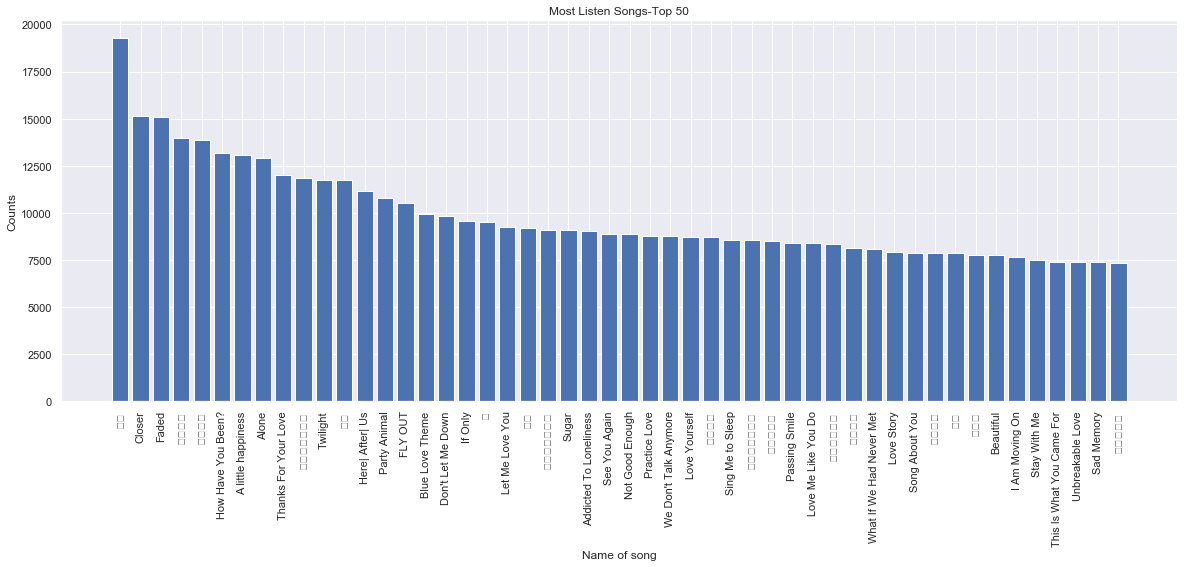

In [ ]:
plt.figure(figsize= (20,7))
plt.bar(song_name,y)
plt.ylabel('Counts')
plt.title('Most Listen Songs-Top 50')
plt.xticks(rotation=90)
plt.xlabel('Name of song')
plt.show()

## Observation of Bar plot 
#### Feature name : Top 50 Counted Songs
* first song is chinese.From data we can say this song is Popular(because this song is Most listen.)
* 2nd and 3rd most listen song is closer and faded respectively.

# Analysis of Artist name
## Top 50 Artist - Most counted Artist Means user's like to listen that artist.

In [ ]:
dic = Counter(data['artist_name'].values)
#sort in deccending order by values
dic = sorted(dic.items(), key=lambda x: x[1], reverse=True)

#get name of sorted dic
x , y = [] , []
for name in dic[:50]:
    x.append(name[0])
    y.append(name[1])
# x = name of song
# y = count of song

# In '()' words is traslation of chinese language
# this code return english laguage if it is given
name = []
for i in x:
    i = i.split('(')
    i = i[-1].replace(')' , "")
    name.append(i)

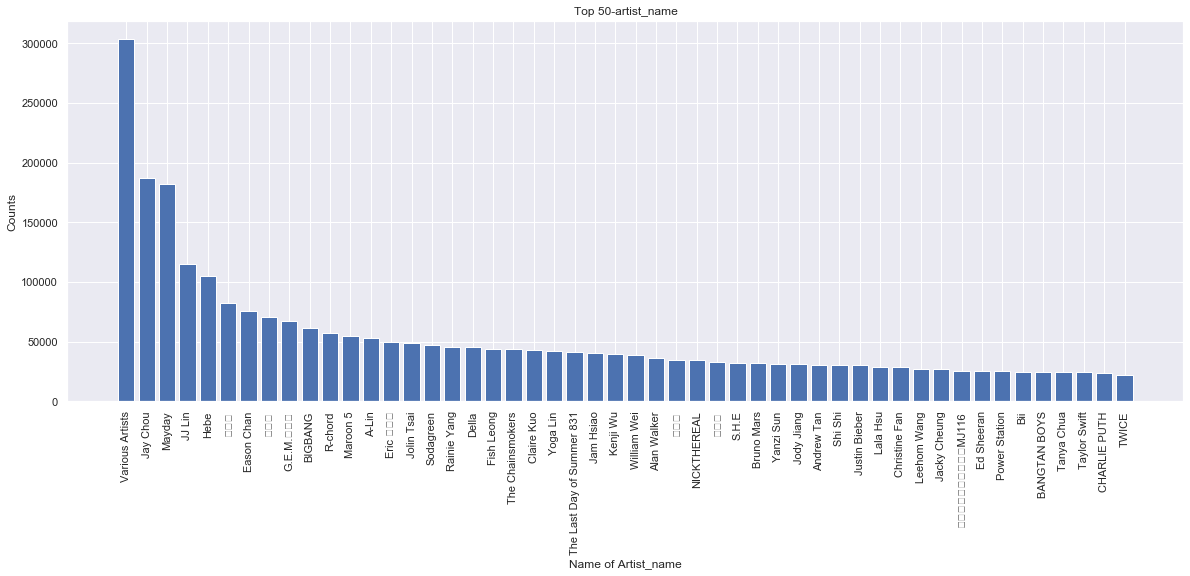

In [ ]:
plt.figure(figsize= (20,7))
plt.bar(name,y)
plt.ylabel('Counts')
plt.title('Top 50-artist_name')
plt.xticks(rotation=90)
plt.xlabel('Name of Artist_name')
plt.show()

## Observation of  Artist name
#### Feature name : artist_name
* Most artist_name is variouse Artists.Here we have not particular name of Artist.
* user like to listen song which create by jay chou and mayday.

# ***Done***

# Check Correlation between Feature

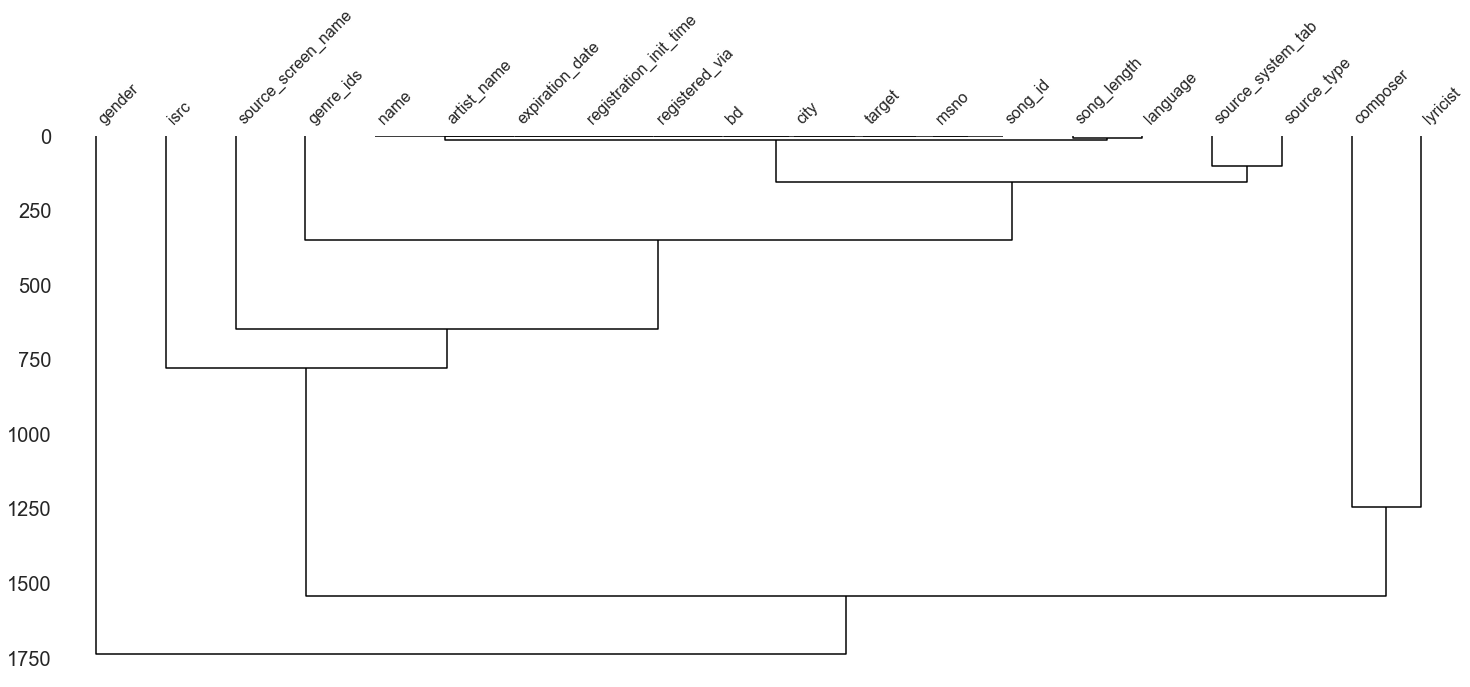

In [ ]:
msno.dendrogram(data)

## Observation Of Dendrogram
* From Dendrogram we can understand how similar (or dissimilar) feature are.
#### Similar features
* song_length and language
* source_system_tab and source_type
* composer and lyricist


### =======================================================================================

In [ ]:
data.to_csv('data.csv')

# Find Missing values

In [ ]:
find_missing_values(data)

Shape of file : (7377418, 20)
columns_name         missing_values in %
------------------------------
msno                       : 0.0
song_id                    : 0.0
source_system_tab          : 0.3368251602389888
source_screen_name         : 5.622617560778039
source_type                : 0.2919585144829804
target                     : 0.0
city                       : 0.0
bd                         : 0.0
gender                     : 40.1424861652139
registered_via             : 0.0
registration_init_time     : 0.0
expiration_date            : 0.0
song_length                : 0.0015452560773972683
genre_ids                  : 1.6056430583166088
artist_name                : 0.0015452560773972683
composer                   : 22.713990179219884
lyricist                   : 43.08821866945861
language                   : 0.0020332316807858794
name                       : 0.02129471313676411
isrc                       : 7.834217879480327


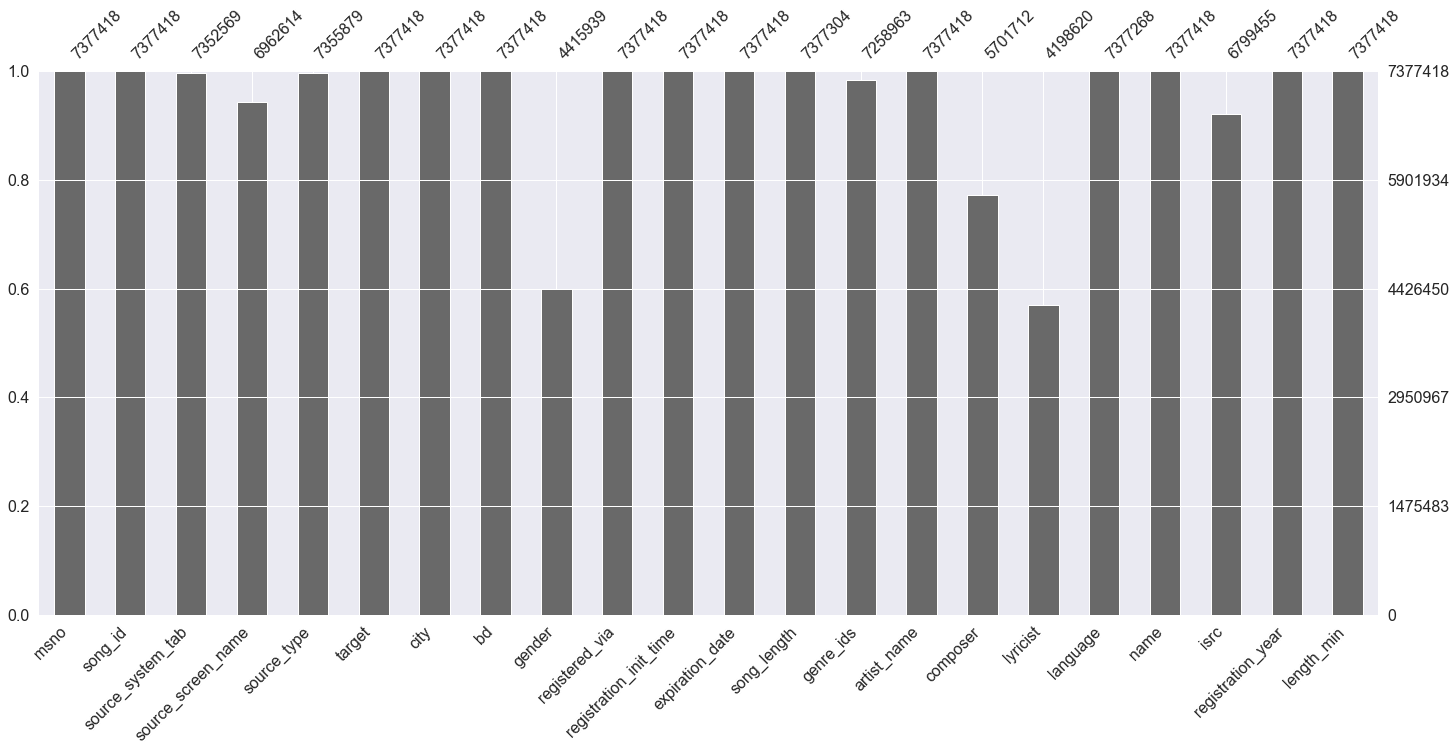

In [ ]:
msno.bar(data)

## Observation 
* source_system_tab , source_type , song_length , artist_name , language , name features have less than 1% missing value.
* lyricist feature have 43.09% missing value.
* gender feature have 40.14% missing value.
* outoff above all feature have less than 8% missing value.

# **Correlation of Categorical Features vs Target**

In [ ]:
cat_features = ['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date','artist_name', 'composer', 'lyricist', 'language', 'name', 'isrc',
       'one_genre', 'two_genre', 'three_genre', 'four_genre', 'five_genre',
       'six_genre', 'seven_genre', 'eight_genre']

In [ ]:
# https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    #print(np.sqrt(phi2corr/min((kcorr-1),(rcorr-1))))
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [ ]:
# we take sample because of computation limit.
x_train = data.sample(250000)
print(x_train.shape)

(250000, 27)


In [ ]:
value = []
key = []
for i in (cat_features):
    vertical_label.append(i)
    x = x_train[i]
    y = x_train['target']
    ans = cramers_v(x,y)
    #print(i,'vs','target')
    #print(round(ans,2))
    key.append(i)
    val.append(round(ans,2))

In [ ]:
d = dict(zip(key,val))
correlation = pd.DataFrame(d,columns =['feature','correlation_with_target'])
correlation = correlation.sort_values('correlation_with_target' , ascending=False)
correlation.head()

,feature,correlation_with_target
25,target,1.00
24,msno,0.34
23,source_screen_name,0.28
22,source_type,0.27
21,source_system_tab,0.25


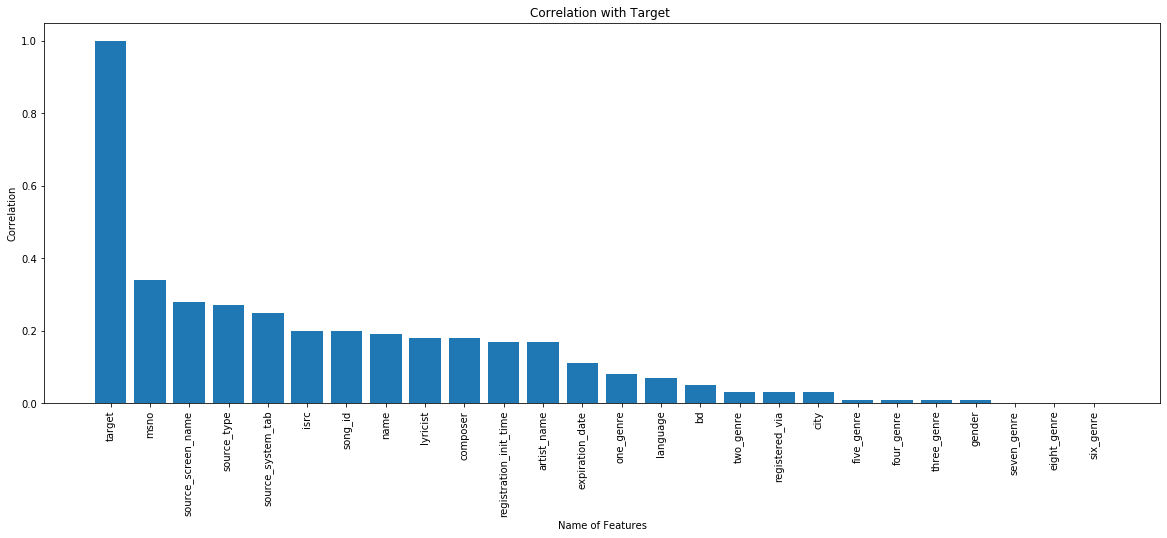

In [ ]:
plt.figure(figsize= (20,7))
plt.bar( correlation['feature'] , correlation['correlation_with_target'])
plt.ylabel('Correlation')
plt.title('Correlation with Target ')
plt.xticks(rotation=90)
plt.xlabel('Name of Features')
plt.show()

# Observation
* Here we can see that five_genre , four_genre , three_genre , gender , seven_genre , eight_genre ,six_genre have very less correlation with target.
* msno , source_scree_name , source_type , source_system_tab are highly correlate compare to others.

In [ ]:
set(data.columns) - set(cat_features)

{'song_length'}

In [ ]:
#https://dzone.com/articles/correlation-between-categorical-and-continuous-var-1
data[['song_length','target']].corr()

,song_length,target
song_length,1.000000,-0.001809
target,-0.001809,1.000000


 
* song_length is not correlate with target.

# Conclusion of EDA

#### * First we know dataset contains missing values.
#### * bd(age) features have outliers.
#### * we need to extract features from datasets.

